In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.compose import ColumnTransformer

from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV 
from sklearn.linear_model import Perceptron, LogisticRegressionCV, RidgeClassifierCV, SGDClassifier, PassiveAggressiveClassifier, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error, confusion_matrix, silhouette_score
from sklearn.metrics import roc_auc_score,roc_curve, auc, classification_report,precision_score,recall_score,log_loss,f1_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer,minmax_scale,PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn.kernel_approximation import RBFSampler
from sklearn import tree
import pandas_bokeh
from sklearn.decomposition import PCA,KernelPCA
from sklearn.calibration import CalibratedClassifierCV
from numpy import mean, std
import pandas.testing as tm
from scipy import stats
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import ExtraTreeClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer




from yellowbrick.features import PCA as PCA_YB
from yellowbrick.features.radviz import RadViz
from yellowbrick.features import pca_decomposition
from yellowbrick.features import Manifold
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import CVScores
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import ParallelCoordinates
from yellowbrick.model_selection import RFECV
from yellowbrick.classifier import ROCAUC


#other
from math import sqrt
import inspect
from matplotlib.font_manager import FontProperties
from scipy.stats import loguniform, uniform
from bokeh import io

import eli5
%matplotlib inline

In [4]:
DATASET_URL = "https://gist.githubusercontent.com/YHYeoh/ad1a7f7170c72d621d05a70637540152/raw/5a6059c199e2c46d2f3d258f03d93cfea98e2749/marketing_campaign.csv"
data = pd.read_csv(DATASET_URL, sep = ';')

pd.set_option('plotting.backend','pandas_bokeh')

data.fillna(method = "ffill", inplace = True)
data.isnull().values.any()


education_order = [['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD']]
ordinal_encoder = OrdinalEncoder(categories=education_order)
enc = OneHotEncoder()


data["Education"] = (ordinal_encoder.fit_transform(data["Education"].values.reshape(-1, 1))).astype(int)
print(ordinal_encoder.categories_)

data_copy = data
marital_status_ohe = pd.get_dummies(data["Marital_Status"],prefix="Marital")
ohe_cols = marital_status_ohe.columns
data = pd.concat([data, marital_status_ohe], axis=1)


data['enroll_year'] = pd.DatetimeIndex(data.Dt_Customer).year
data['enroll_month'] = pd.DatetimeIndex(data.Dt_Customer).month
data['enroll_day'] = pd.DatetimeIndex(data.Dt_Customer).day

data.drop(["ID", 'Dt_Customer',"Z_CostContact","Z_Revenue","Marital_Status"], axis=1, inplace=True)

categorical = ['Marital_Status']
numerical = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'enroll_year', 'enroll_month', 'enroll_day']
numerical_no_bool = ['Education','Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','enroll_day','enroll_month','enroll_year']

y = data.Response
print(y.value_counts())
X = data.drop(['Response'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)
X_train_cont = X_train.drop(['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Education','Complain','Year_Birth','Marital_Absurd', 'Marital_Alone', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Marital_Together',
       'Marital_Widow', 'Marital_YOLO', 'enroll_year', 'enroll_month',
       'enroll_day'],axis=1)
X_test_cont = X_test.drop(['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Education','Complain','Year_Birth','Marital_Absurd', 'Marital_Alone', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Marital_Together',
       'Marital_Widow', 'Marital_YOLO', 'enroll_year', 'enroll_month',
       'enroll_day'],axis=1)
X_cont_column = X_train_cont.columns
pcaX_train = X_train_cont
pcaX_test = X_test_cont

[array(['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD'], dtype=object)]
0    1906
1     334
Name: Response, dtype: int64


In [5]:
def hasmethod(obj, name):
	return inspect.ismethod(getattr(obj, name, None))

def ROC_Curve_Plot(model,X_test,y_test,name):
	predProb = model.predict_proba(X_test)
	preds = predProb[:,1]
	fpr, tpr, threshold = roc_curve(y_test, preds,pos_label=1)
	roc_auc = auc(fpr, tpr)
	plt.close()
	plt.title(name+' Receiver Operating Characteristic')
	plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
	plt.legend(loc = 'lower right')
	plt.plot([0, 1], [0, 1],'r--')
	plt.ylabel('True Positive Rate')
	plt.xlabel('False Positive Rate')
	plt.show()
	return fpr,tpr

def setupPreprocessPipeline(scaler):
	ss = Pipeline(steps=[('scaler',scaler)])
	#ohe = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown = 'ignore'))])
	preprocess = ColumnTransformer(
                    transformers=[
                        ('cont', ss, numerical_no_bool)
                        #('cat', ohe, categorical),
                        #('le', le, ordinal),
                        ],remainder='passthrough')
	return preprocess

def feature_importance(classifier, feature_names, scaler_name):
	if (hasattr(classifier,'coef_')):
		importance = classifier.coef_[0]
	elif (hasattr(classifier,'coefs_')):
		importance = classifier.coefs_
	elif (hasattr(classifier,'feature_importances_')):
		importance = classifier.feature_importances_
	else:
		print("Cannot extract feature importance, skipping")
		return

	#for i,v in enumerate(importance):
	#	print('Feature: %d, Score: %.5f' % (i,v))
	zipped = zip(feature_names, importance)
	df = pd.DataFrame(zipped, columns=["feature", "value"])
	# Sort the features by the absolute value of their coefficient
	df["abs_value"] = df["value"].apply(lambda x: abs(x))
	df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
	df = df.sort_values("abs_value", ascending=False)
	# plot feature importance
	fig, ax = plt.subplots(1, 1, figsize=(16, 9))
	sns.barplot(x="feature",
	            y="value",
	            data=df.head(20),
	           palette=df.head(20)["colors"])
	plt.gcf().subplots_adjust(bottom=0.30)
	ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)
	ax.set_title("Top 20 Features for {} w/ {}".format(classifier.__class__.__name__, scaler_name), fontsize=25)
	ax.set_ylabel("Coef", fontsize=22)
	ax.set_xlabel("Feature Name", fontsize=22)
	plt.show()

def evaluation(y, y_hat, title):
	cm = confusion_matrix(y, y_hat)
	precision = precision_score(y, y_hat)
	recall = recall_score(y, y_hat)
	accuracy = accuracy_score(y,y_hat)
	f1 = f1_score(y,y_hat)
	print('Recall: ', recall)
	print('Accuracy: ', accuracy)
	print('Precision: ', precision)
	print('F1: ', f1)
	sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})
	plt.xlabel('predicted', fontsize=18)
	plt.ylabel('actual', fontsize=18)
	plt.title(title, fontsize=18)
	plt.show()
    
def metrics_summary(y_test,y_pred):
	tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
	accuracy=accuracy_score(y_test, y_pred)
	precision = precision_score(y_test, y_pred)
	recall =  recall_score(y_test, y_pred) #sensitivity
	specificity = tn / (tn+fp)
	g_mean= sqrt(recall * specificity)
	mse =mean_squared_error(y_test, y_pred, squared=False)
	r2=r2_score(y_test, y_pred)
	ros = roc_auc_score(y_test, y_pred)
	ll = log_loss(y_test, y_pred)
	f1 = f1_score(y_test, y_pred)
	
	metrics_collection_dict ={
        'accuracy':['accuracy',accuracy],
        'precision':['precision',precision],
        'recall':['recall',recall],
        'specificity':['specificity',specificity],
        'g_mean':['g_mean',g_mean],
        'mean_square_error':['mean_square_error',mse],
        'r2':['r2',r2],
        'roc_auc_score':['roc_auc_score',ros],
        'log_loss':['log_loss',ll],
        'f1_score':['f1_score',f1]
    } 
	return metrics_collection_dict

def correlationPlot():
	visualizer = Rank2D(
        features=X_train.columns, algorithm='covariance'
    )
	visualizer.fit(X_train, y_train)                # Fit the data to the visualizer
	visualizer.transform(X_train)             # Transform the data
	visualizer.show()                   # Finalize and render the figure

def radVisualize():
	visualizer = RadViz() #nice
	visualizer.fit(X, y)
	visualizer.transform(X)
	visualizer.show()
def pca_scatter_plot():
	visualizer = pca_decomposition(X, y, scale=True, classes=['no','yes'])
	visualizer.show()
def precision_recall_curve(model):
	viz = PrecisionRecallCurve(model)
	viz.fit(X_train, y_train)
	viz.score(X_test, y_test)          #ok
	viz.show()
    
def overallClassificationReport(model,classes):
	visualizer = ClassificationReport(model, classes=classes, support=True) #might can change
	visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
	if(model.__class__.__name__ == "XGBClassifier"): #special treatment for xgboost as it reordered column
		model.fit(X_train, y_train)
		reorderedColumn = model.get_booster().feature_names
		reordered_Xtest = X_test[reorderedColumn] #reorderColumn
		visualizer.score(X_test, y_test)        
		visualizer.show()
		return
	visualizer.score(X_test, y_test)        # Evaluate the model on the test data
	visualizer.show()

def class_predict_err_plot(model,classes):
	visualizer = ClassPredictionError(model, classes=classes,encoder={1: 'yes',0: 'no'})
	# Fit the training data to the visualizer
	visualizer.fit(X_train, y_train)
	# Evaluate the model on the test data
	visualizer.score(X_test, y_test)
	# Draw visualization
	visualizer.show()

def learning_curve_plot(model):
	cv = StratifiedKFold(n_splits=12)
	sizes = np.linspace(0.3, 1.0, 10)

	# Instantiate the classification model and visualizer
	visualizer = LearningCurve(
	    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
	)
	visualizer.fit(X, y)        # Fit the data to the visualizer
	visualizer.show()
    
def cv_scores_plot(model):
	cv = StratifiedKFold(n_splits=12, random_state=42, shuffle= True)
	visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

	visualizer.fit(X, y)        # Fit the data to the visualizer
	visualizer.show()
def overall_feature_importance(model):
	labels = list(map(lambda s: s.title(), X.columns))
	viz = FeatureImportances(model, labels=labels,encoder={1: 'yes',0: 'no'}, relative=False, topn = 8)
	viz.fit(X, y)
	viz.show()
def RFECV_plot(model):
	cv= StratifiedKFold(5)
	# Instantiate RFECV visualizer with a linear SVM classifier
	visualizer = RFECV(model, cv= cv)
	visualizer.fit(X, y)        # Fit the data to the visualizer
	visualizer.show()      #ok
    
def has_feature_imp(classifier):
	status = False
	if (hasattr(classifier,'coef_')):
		status = True
	elif (hasattr(classifier,'coefs_')):
		status = True
	elif (hasattr(classifier,'feature_importances_')):
		status = True
	print("Cannot extract feature importance, skipping")
	return status

def make_plot(item_idx):
	title, X = distributions[item_idx]
	ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
	axarr = (ax_zoom_out, ax_zoom_in)
	plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

	# zoom-in
	zoom_in_percentile_range = (0, 99)
	cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
	cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

	non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
	plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

	norm = mpl.colors.Normalize(y_full.min(), y_full.max())
	mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')
    
def scorer(pcamodel, X, y=None):
    try:
        X_val = X.values
    except:
        X_val = X
    
    try:
        y_val = y.values
    except:
        y_val = y
    data_inv = pcamodel.fit(X_val,y_val).transform(X_val)
    reconstructed = pcamodel.inverse_transform(data_inv)
    #find reconstrucition error
    mse = mean_squared_error(reconstructed.ravel(), X_val.ravel())
    return abs(mse)

def pcaComparison(scaler,X_train,y_train,X_test,y_test):
    cv=10
    scaler = scaler
    X_train_scaled = scaler.fit_transform(pcaX_train,y_train)
    X_test_scaled = scaler.transform(pcaX_test)
    pcaPerformance = pd.DataFrame()
    for transformer in pcaParamGrid :
        pca = transformer['transformer']
        param_grid =  transformer['param_grid']
        PCASearch = RandomizedSearchCV(pca,param_grid,n_iter=10,verbose=2,
                         scoring= scorer,
                         n_jobs=-1,cv=cv,random_state=42)
        PCASearch = PCASearch.fit(X_train_scaled,y_train)

        param = PCASearch.best_params_
        name = PCASearch.best_estimator_.__class__.__name__
        score = PCASearch.best_score_
        pcaResult = {"Model":name,"MSE": score,"Parameter":param,"scaler":scaler}
        pcaPerformance = pcaPerformance.append(pcaResult,ignore_index=True)
    pcaPerformance.sort_values(by='MSE',ascending=True,inplace=True)
    return pcaPerformance

In [6]:

def cross_validate(classifier, cv):
	scalers = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(), RobustScaler(),QuantileTransformer()]
	train_acc = []
	test_acc = []
	mean = []
	result = []
	for scaler in scalers:
		fpr = None
		tpr = None
		preprocess = setupPreprocessPipeline(scaler)
		pipeline = Pipeline(steps=[
	        ('preprocess', preprocess),
	        ('classifier', classifier)
		])

		train_acc = []
		test_acc = []
		mean = []

		for train_ind, val_ind in cv.split(X_train, y_train):
			X_t, y_t = X_train.iloc[train_ind], y_train.iloc[train_ind]
			pipeline.fit(X_t, y_t)
			y_hat_t = pipeline.predict(X_t)
			train_acc.append(accuracy_score(y_t, y_hat_t))
			X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind] 
			y_hat_val = pipeline.predict(X_val)
			test_acc.append(accuracy_score(y_val, y_hat_val))

		#ohe_cols = list(pipeline.named_steps['preprocess'].named_transformers_['cat'].named_steps['ohe'].get_feature_names(input_features=categorical))
		numeric_feature_list = list(numerical)
		for i in ohe_cols:
			numeric_feature_list.append(i)
		#print(len(numeric_feature_list))
		#evaluation(y_val, y_hat_val, 'Confusion Matrix {} + {}'.format(classifier.__class__.__name__, scaler.__class__.__name__).strip())
		print('Mean Training Accuracy: {} | Standard Deviation: {}'.format(np.mean(train_acc),np.std(test_acc)))
		print('Mean Validation Accuracy: {} | Standard Deviation: {}'.format(np.mean(test_acc),np.std(test_acc)))
		print('\n')
		feature_importance(classifier, numeric_feature_list, scaler.__class__.__name__ )
		print(y_val.shape,y_hat_val.shape)        
		metrics_summ = metrics_summary(y_val,y_hat_val)
		if hasmethod(pipeline['classifier'], 'predict_proba'):
			fpr,tpr = ROC_Curve_Plot(pipeline,X_val,y_val,classifier.__class__.__name__ +" w "+scaler.__class__.__name__)
		result.append({
            'classifier':classifier.__class__.__name__,
            'scalerName':scaler.__class__.__name__,
            'metrics_summ':metrics_summ,
            'fpr':fpr,
            'tpr':tpr
        })
	return result

SGDClassifier
Mean Training Accuracy: 0.5709727596789874 | Standard Deviation: 0.34198973498600493
Mean Validation Accuracy: 0.5636922325553001 | Standard Deviation: 0.34198973498600493




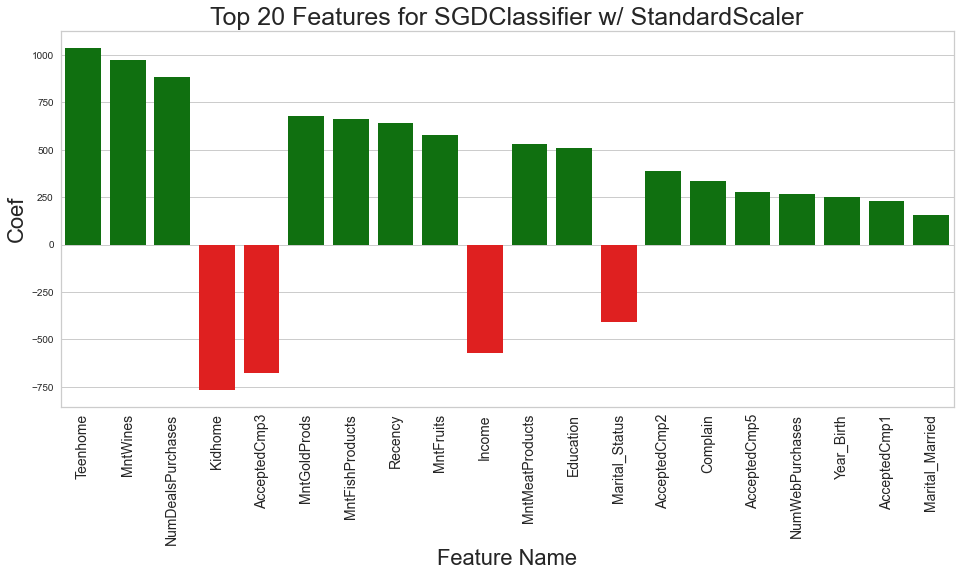

(313,) (313,)
Mean Training Accuracy: 0.5671450084828151 | Standard Deviation: 0.3387860969825923
Mean Validation Accuracy: 0.5789788567591218 | Standard Deviation: 0.3387860969825923




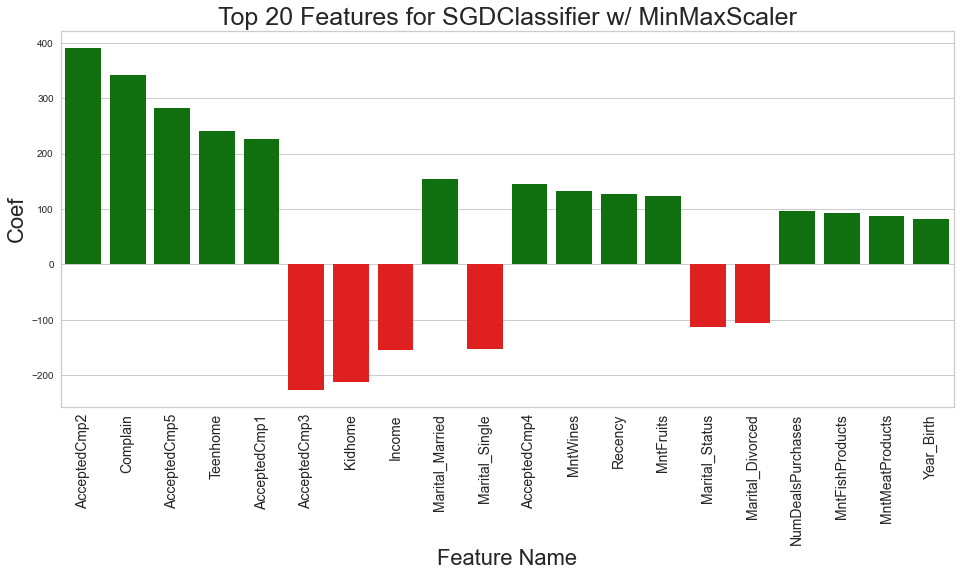

(313,) (313,)
Mean Training Accuracy: 0.847575821117444 | Standard Deviation: 0.014564758662263538
Mean Validation Accuracy: 0.847565169613968 | Standard Deviation: 0.014564758662263538




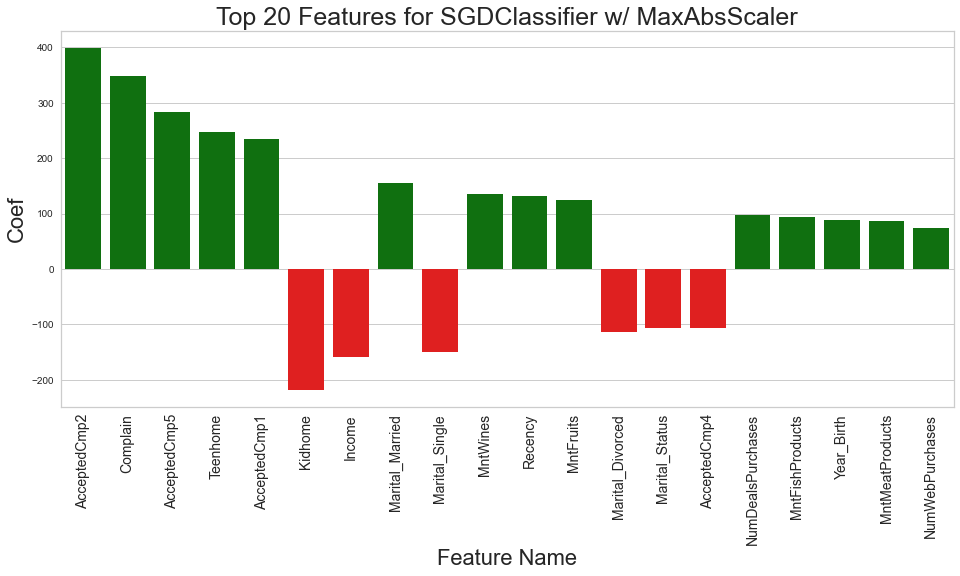

(313,) (313,)


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Training Accuracy: 0.847575821117444 | Standard Deviation: 0.014564758662263538
Mean Validation Accuracy: 0.847565169613968 | Standard Deviation: 0.014564758662263538




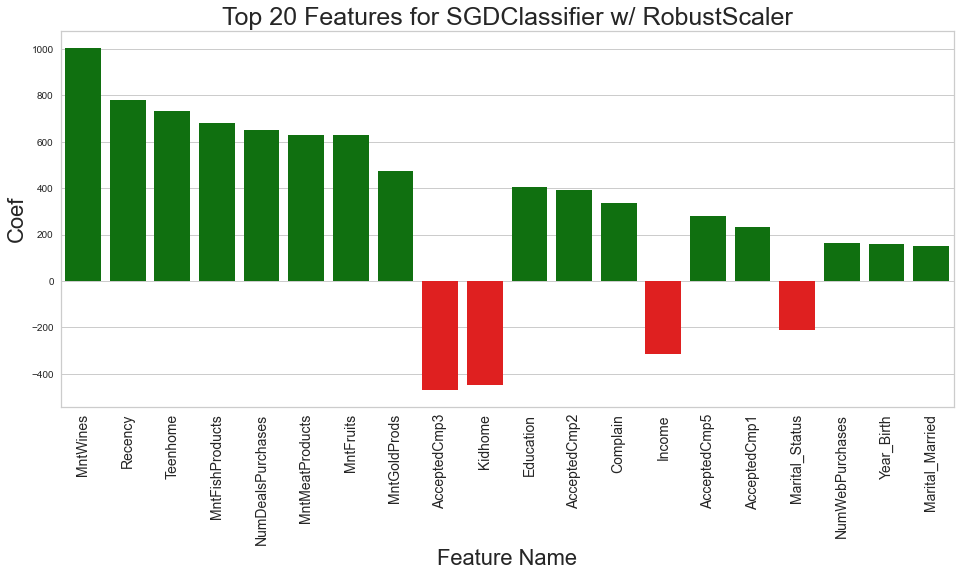

(313,) (313,)


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Training Accuracy: 0.847575821117444 | Standard Deviation: 0.014564758662263538
Mean Validation Accuracy: 0.847565169613968 | Standard Deviation: 0.014564758662263538




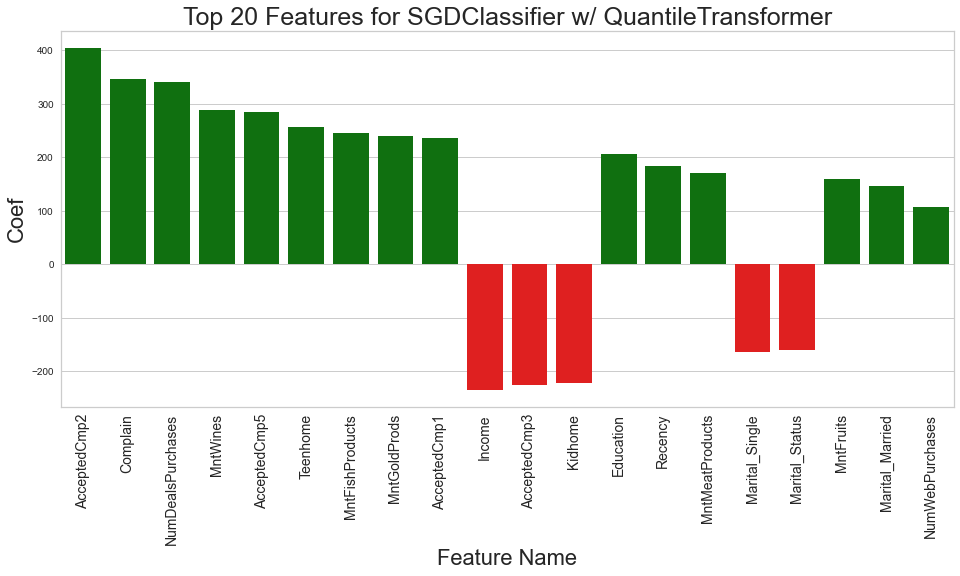

(313,) (313,)


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


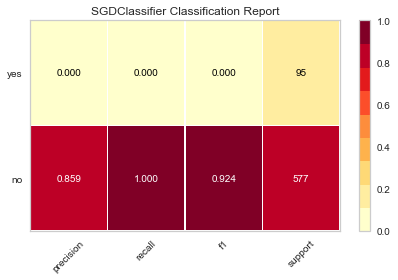

SVC
Mean Training Accuracy: 0.8966833781302224 | Standard Deviation: 0.013324134322547266
Mean Validation Accuracy: 0.8864614069717751 | Standard Deviation: 0.013324134322547266




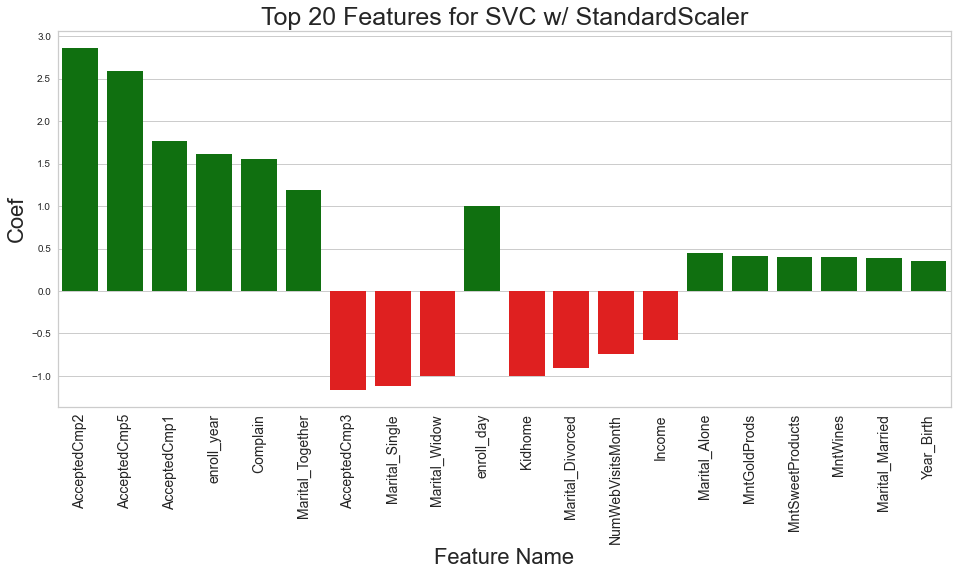

(313,) (313,)
Mean Training Accuracy: 0.8941315439994406 | Standard Deviation: 0.00971205632081916
Mean Validation Accuracy: 0.8947660812763273 | Standard Deviation: 0.00971205632081916




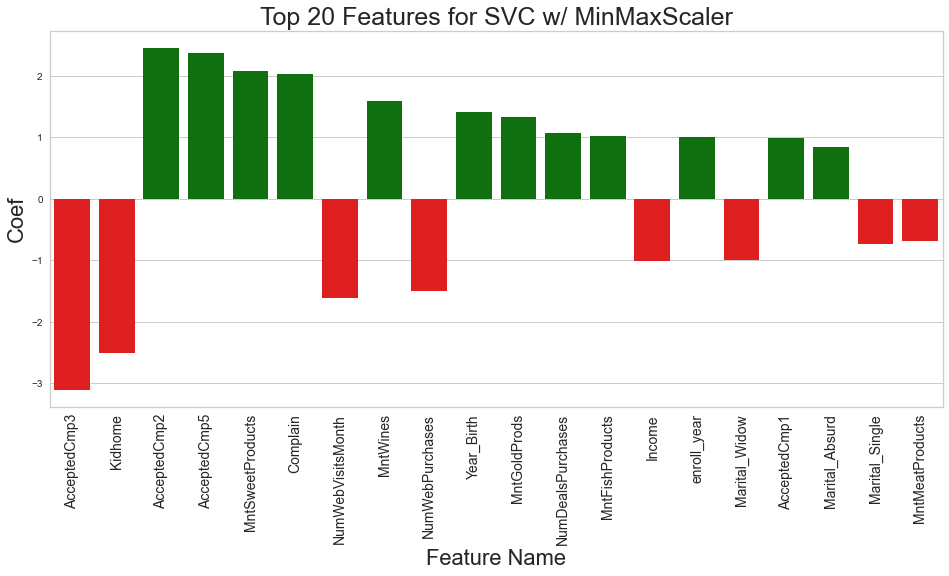

(313,) (313,)
Mean Training Accuracy: 0.8919007224689759 | Standard Deviation: 0.011497941710907195
Mean Validation Accuracy: 0.8864797216173868 | Standard Deviation: 0.011497941710907195




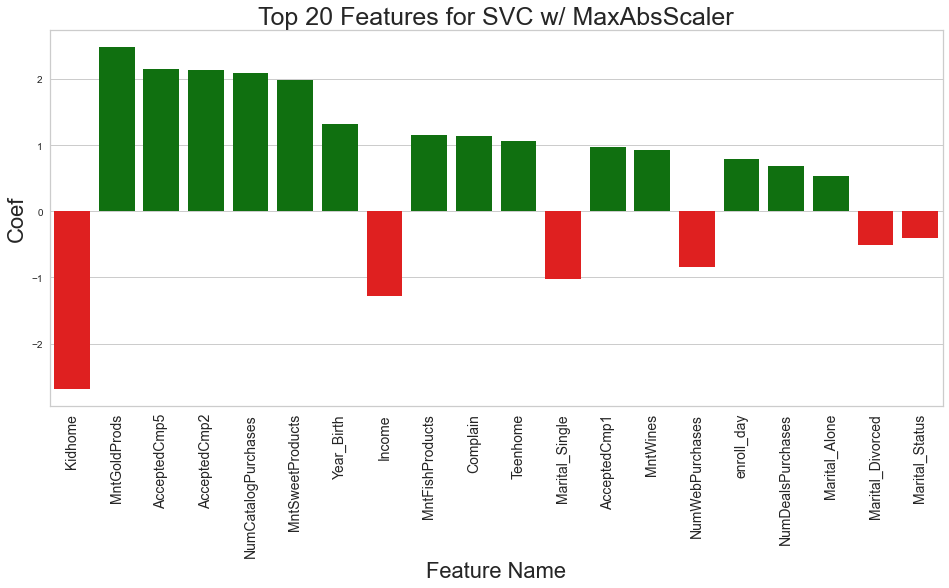

(313,) (313,)
Mean Training Accuracy: 0.8982781473785877 | Standard Deviation: 0.0086781429640105
Mean Validation Accuracy: 0.8922162756150668 | Standard Deviation: 0.0086781429640105




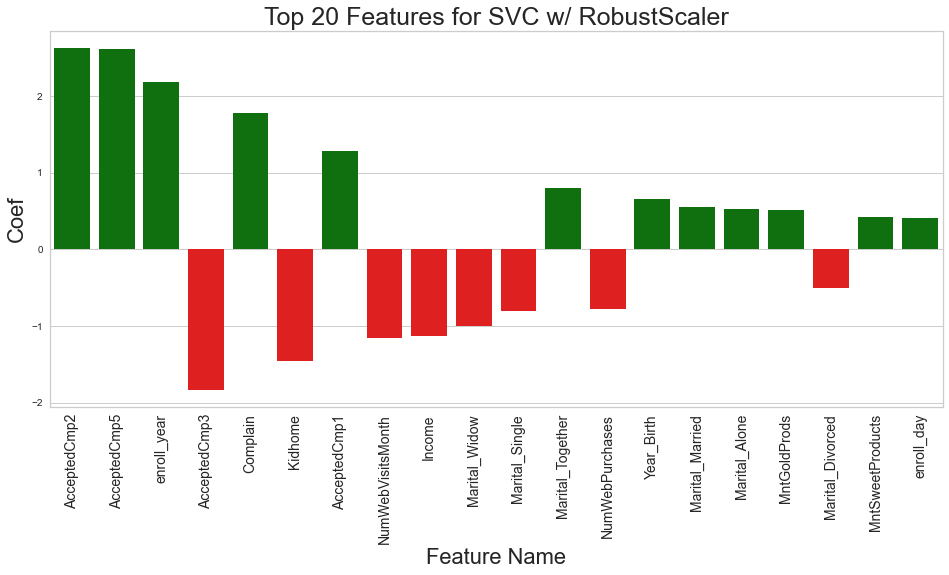

(313,) (313,)
Mean Training Accuracy: 0.9019448839411096 | Standard Deviation: 0.009780934879500975
Mean Validation Accuracy: 0.894129138601168 | Standard Deviation: 0.009780934879500975




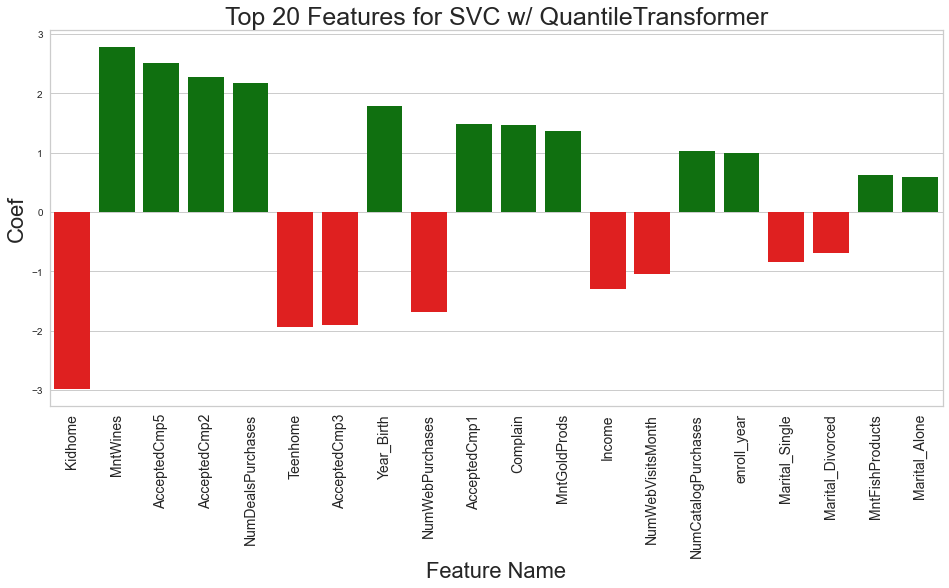

(313,) (313,)


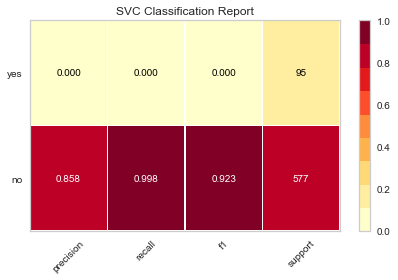

LGBMClassifier
Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.00967642842011504
Mean Validation Accuracy: 0.8750066136220264 | Standard Deviation: 0.00967642842011504




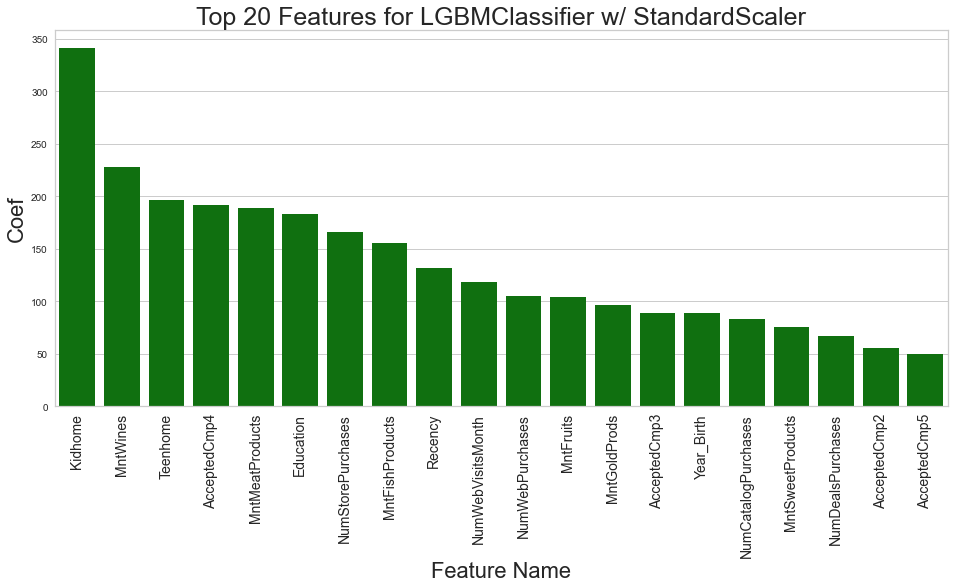

(313,) (313,)


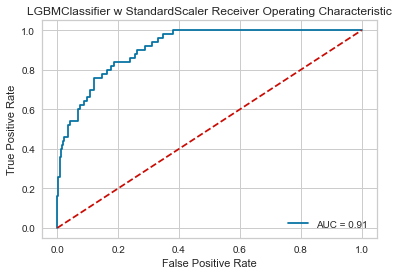

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.011044056960192124
Mean Validation Accuracy: 0.8915813679005312 | Standard Deviation: 0.011044056960192124




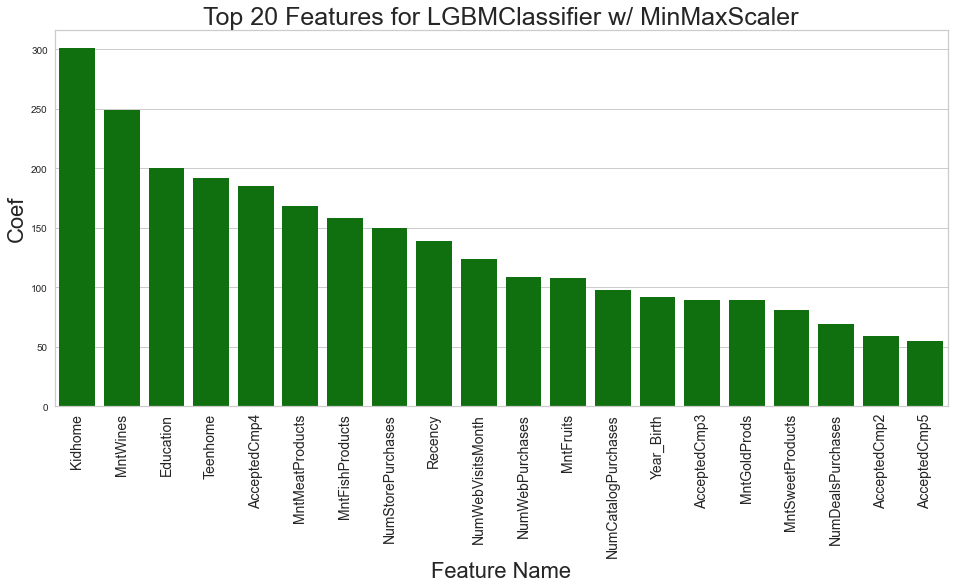

(313,) (313,)


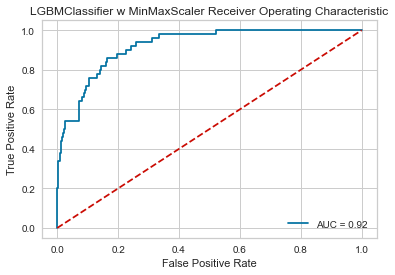

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.011666978890438717
Mean Validation Accuracy: 0.8909423902647484 | Standard Deviation: 0.011666978890438717




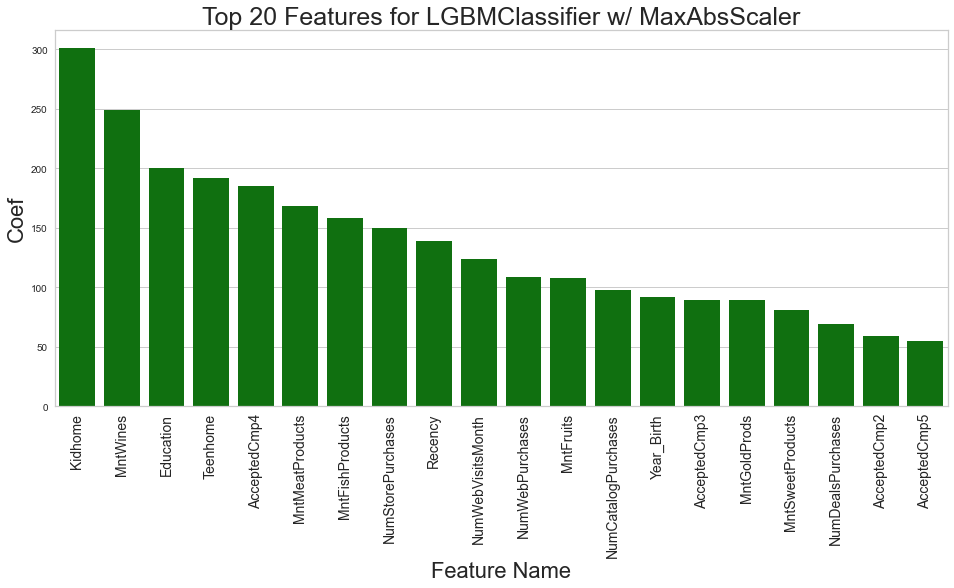

(313,) (313,)


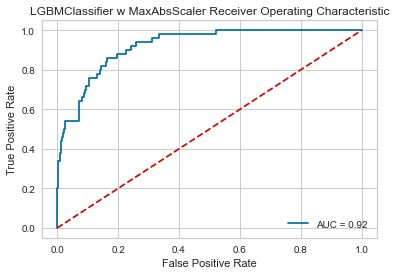

Mean Training Accuracy: 0.995216581838515 | Standard Deviation: 0.012578898691410297
Mean Validation Accuracy: 0.8839238110742558 | Standard Deviation: 0.012578898691410297




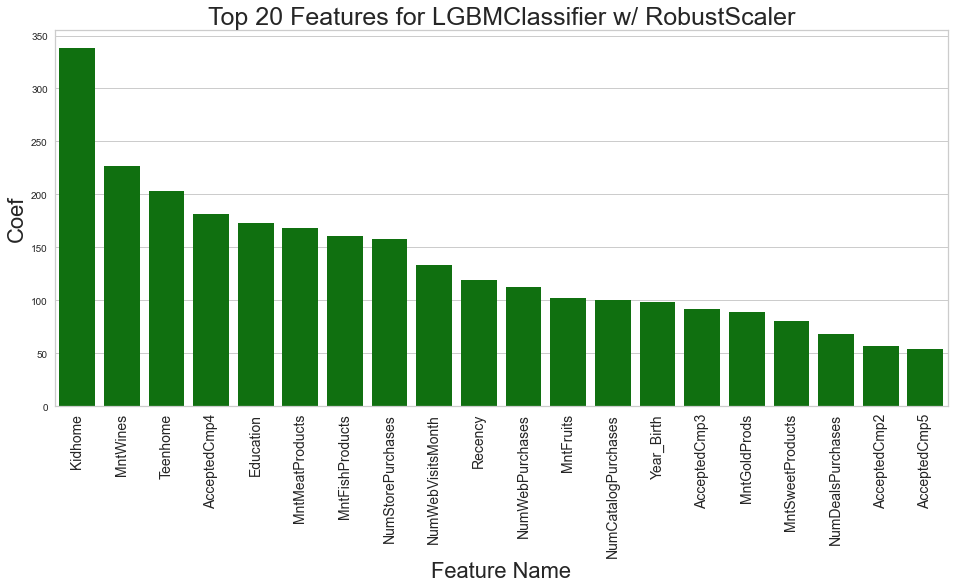

(313,) (313,)


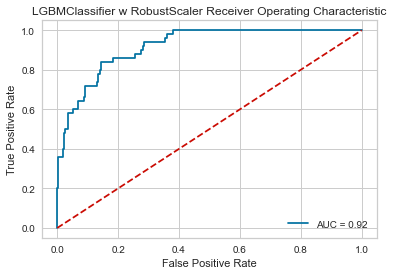

KeyboardInterrupt: 

In [7]:
models = [
	#Lasso(),
	SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet"),
# 	LinearSVC(), 
# 	GaussianProcessClassifier(),
# 	ExtraTreesClassifier(),   #guassiannb, guassian process, mlpclassifier, 
# 	BernoulliNB(),
# 	LogisticRegressionCV(max_iter= 1200), 
# 	RidgeClassifierCV(),
	SVC(kernel = 'linear',max_iter= -1), 
# 	Perceptron(),
# 	PassiveAggressiveClassifier(), 
# 	DecisionTreeClassifier(), #no coef 
# 	KNeighborsClassifier(),#no feat_import, use permutation_importance 
# 	GaussianNB(), #no feat_import, use permutation_importance 
	LGBMClassifier(),#no coef 
# 	RandomForestClassifier(), #no coef 
# 	GradientBoostingClassifier(),#no coef 
# 	PassiveAggressiveClassifier(), 
# 	ExtraTreesClassifier(), #no coef 
	XGBClassifier(),
	AdaBoostClassifier(), #no coef
# 	MLPClassifier() #mlp not working
	]

model_result = []
classes = ["no", "yes"]
for model in models:
	print(model.__class__.__name__)
	model_result.append(cross_validate(model,KFold()))
	overallClassificationReport(model,classes)
	if hasmethod(model, 'predict_proba'):
		ROC_Curve_Plot(model,X_test,y_test,"Overall "+model.__class__.__name__)
# 	precision_recall_curve(model)
# 	class_predict_err_plot(model, classes=classes)
# 	learning_curve_plot(model)
# 	cv_scores_plot(model)
# 	if has_feature_imp(model) :
# 		overall_feature_importance(model)
		#RFECV_plot(model)
warnings.filterwarnings("default")

In [75]:
standardScalerList = []
minMaxScalerList = []
maxAbsScalerList = []
robustScalerList = []
QuantileTransformerList = []
powerTransformerList = []

for collection in model_result:
    standard = collection[0]
    standardScalerList.append({'classifier':standard['classifier'],'metrics_summ':standard['metrics_summ'],'fpr':standard['fpr'],'tpr':standard['tpr'] })
    minMax = collection[1]
    minMaxScalerList.append({'classifier':minMax['classifier'],'metrics_summ':minMax['metrics_summ'],'fpr':minMax['fpr'],'tpr':minMax['tpr'] })
    maxAbs = collection[2]
    maxAbsScalerList.append({'classifier':maxAbs['classifier'],'metrics_summ':maxAbs['metrics_summ'],'fpr':maxAbs['fpr'],'tpr':maxAbs['tpr'] })
    robust = collection[3]
    robustScalerList.append({'classifier':robust['classifier'],'metrics_summ':robust['metrics_summ'],'fpr':robust['fpr'],'tpr':robust['tpr'] })
    quantile = collection[4]
    robustScalerList.append({'classifier':quantile['classifier'],'metrics_summ':quantile['metrics_summ'],'fpr':quantile['fpr'],'tpr':quantile['tpr'] })
    power = collection[5]
    powerTransformerList.append({'classifier':power['classifier'],'metrics_summ':power['metrics_summ'],'fpr':power['fpr'],'tpr':power['tpr'] })


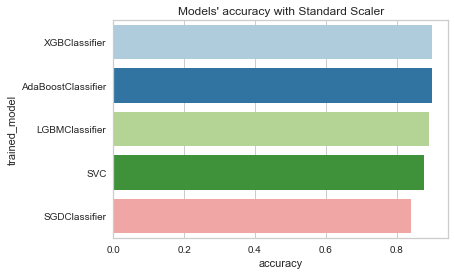

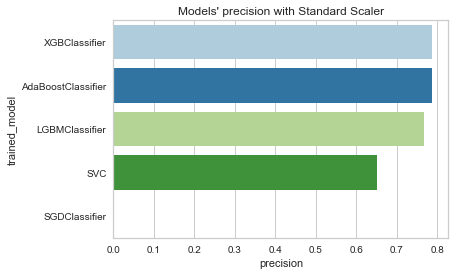

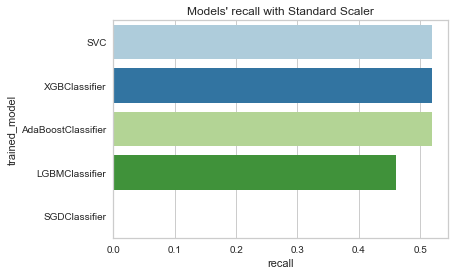

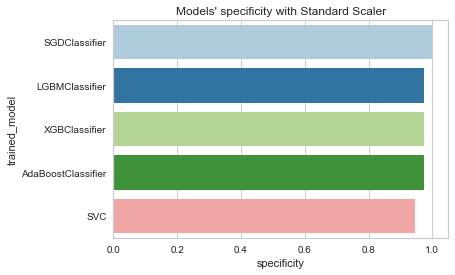

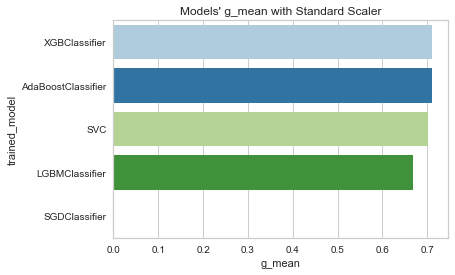

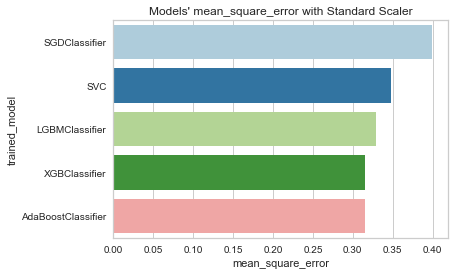

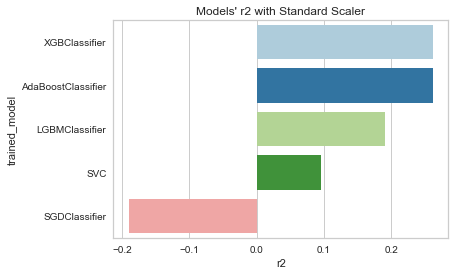

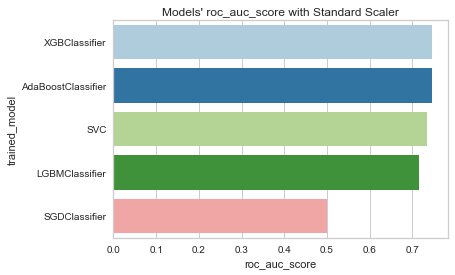

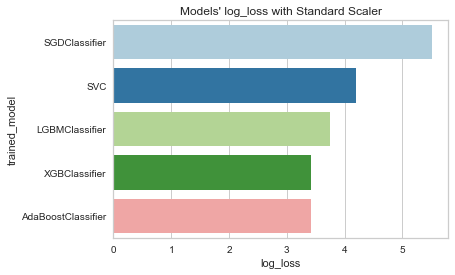

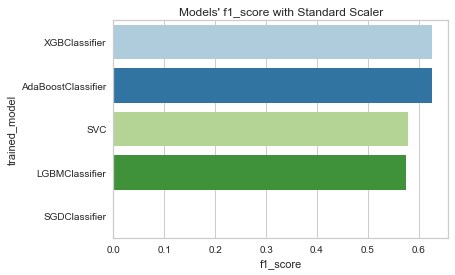

In [77]:
nameList = []

for object in model_result:
    nameList.append(object[0]['classifier'])
metric_list = ['accuracy','precision','recall','specificity','g_mean'
                   ,'mean_square_error','r2','roc_auc_score','log_loss','f1_score']
scaler = ['Standard Scaler','Min Max Scaler','Max Abs Scaler','robust Scaler','power transformer']

selectedMetricColumns = ["Classifier","Scaler","Accuracy"]
testingDF = pd.DataFrame(columns=selectedMetricColumns)
for metric in metric_list:
    resultList = []
    for model in model_result:
        resultList.append(model[0]['metrics_summ'][metric][1])
        
    accDF = pd.DataFrame(list(zip(nameList,resultList)),columns=['trained_model',metric])
    plt.title("Models' "+metric+ " with Standard Scaler")
    ax = sns.barplot(data=accDF.sort_values(metric,ascending=False),orient='h',palette ="Paired" , y = 'trained_model',x=metric)
    plt.show()

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


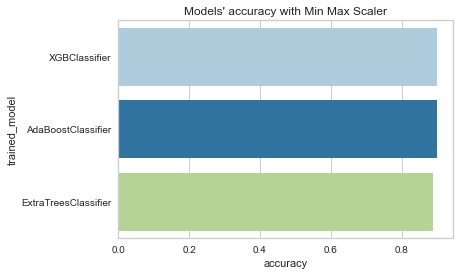

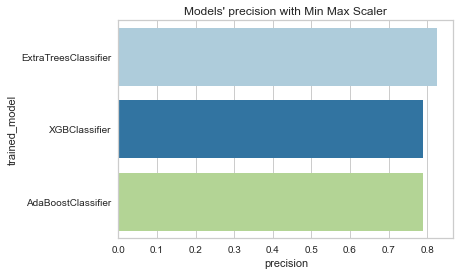

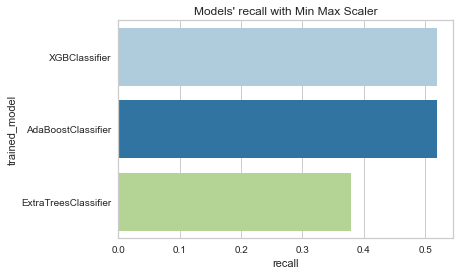

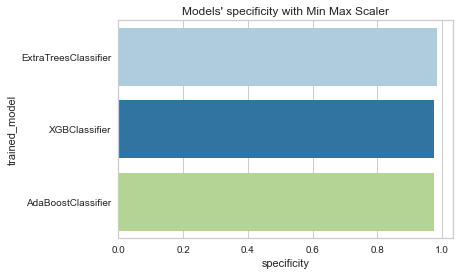

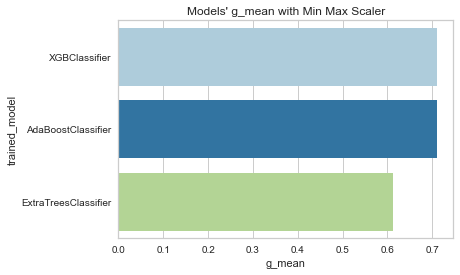

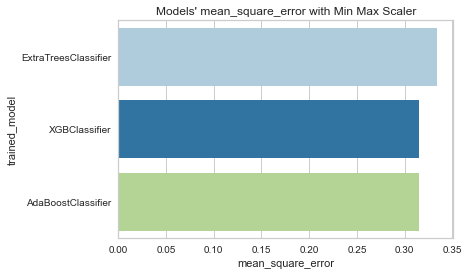

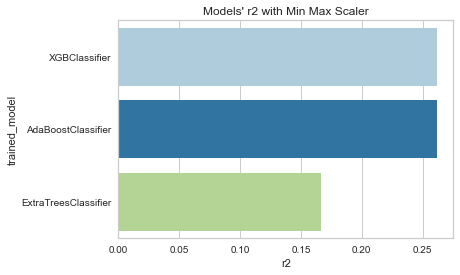

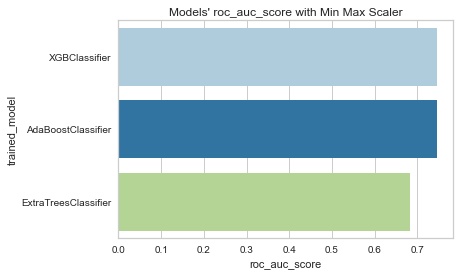

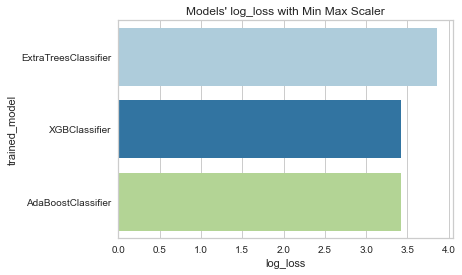

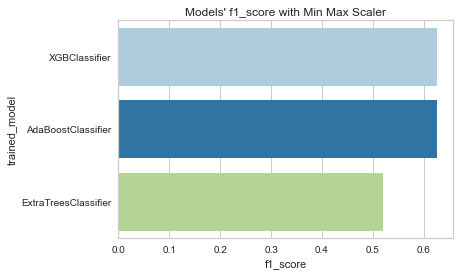

In [81]:
for metric in metric_list:
    resultList = []
    for model in model_result:
        resultList.append(model[1]['metrics_summ'][metric][1])
        
    accDF = pd.DataFrame(list(zip(nameList,resultList)),columns=['trained_model',metric])
    plt.title("Models' "+metric+ " with Min Max Scaler")
    ax = sns.barplot(data=accDF.sort_values(metric,ascending=False),orient='h',palette ="Paired" , y = 'trained_model',x=metric)
    plt.show()

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


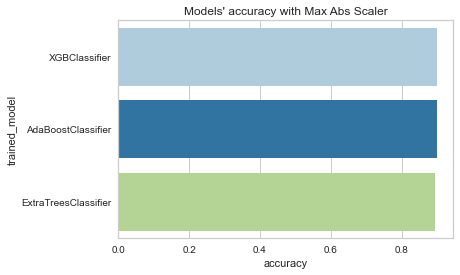

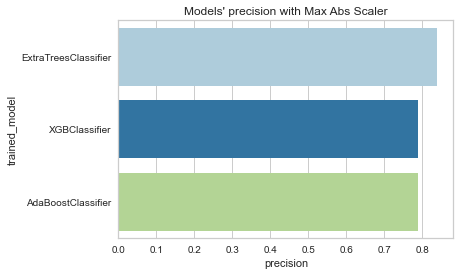

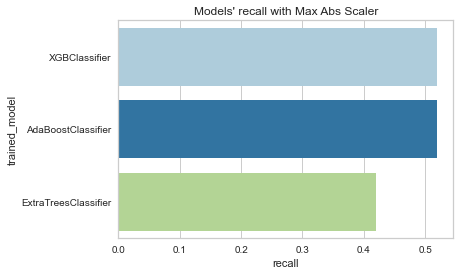

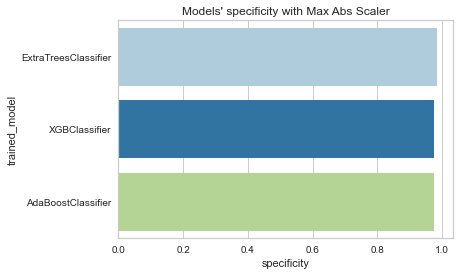

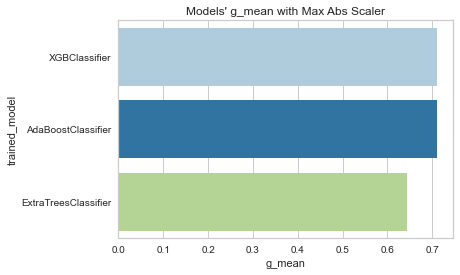

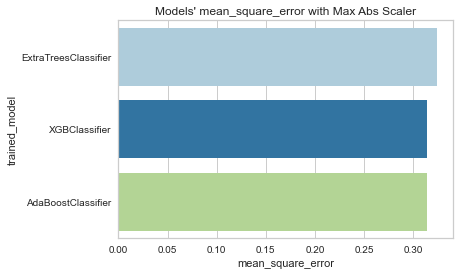

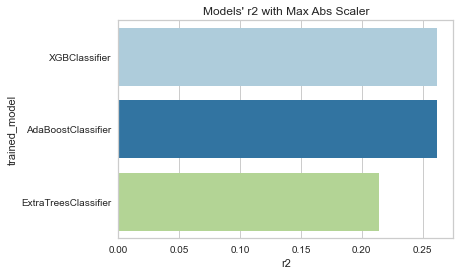

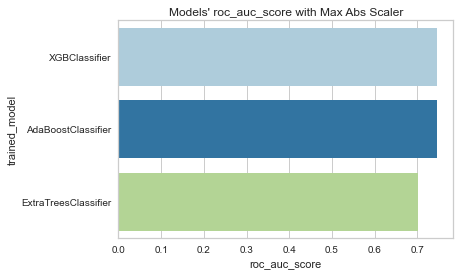

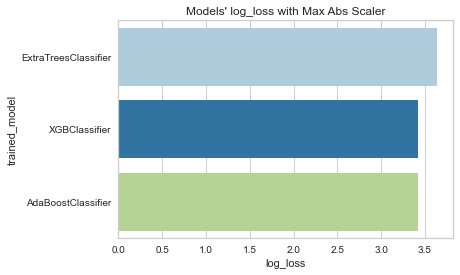

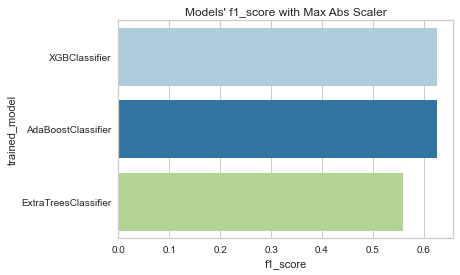

In [82]:
for metric in metric_list:
    resultList = []
    for model in model_result:
        resultList.append(model[2]['metrics_summ'][metric][1])
        
    accDF = pd.DataFrame(list(zip(nameList,resultList)),columns=['trained_model',metric])
    plt.title("Models' "+metric+ " with Max Abs Scaler")
    ax = sns.barplot(data=accDF.sort_values(metric,ascending=False),orient='h',palette ="Paired" , y = 'trained_model',x=metric)
    plt.show()

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


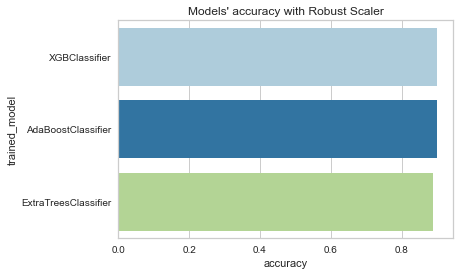

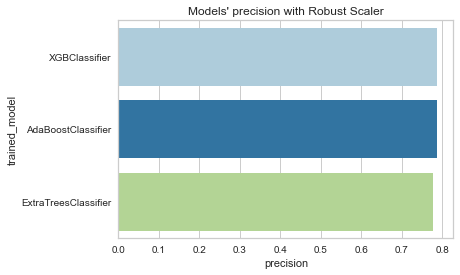

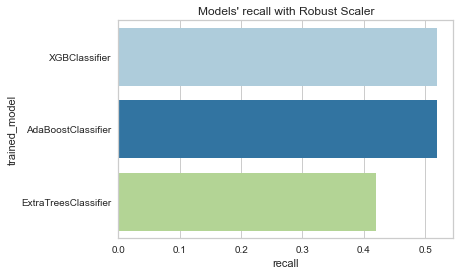

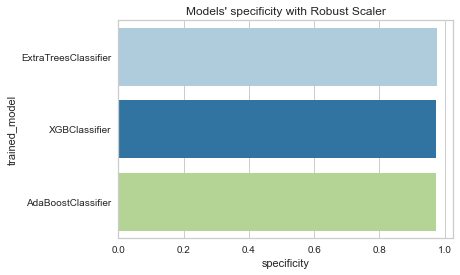

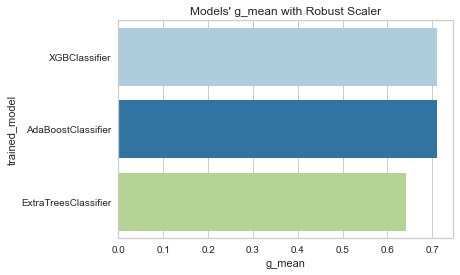

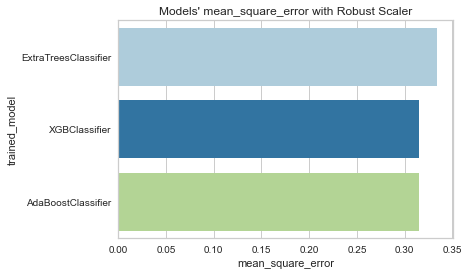

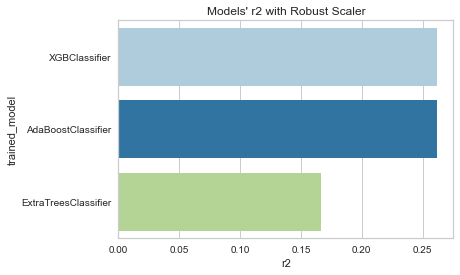

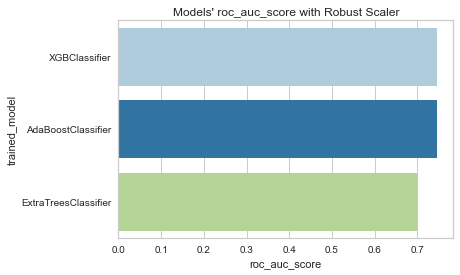

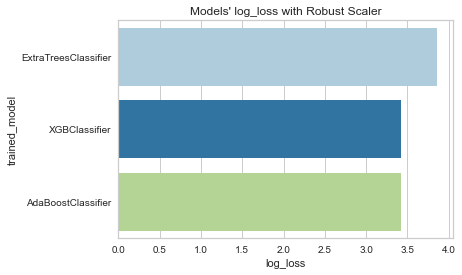

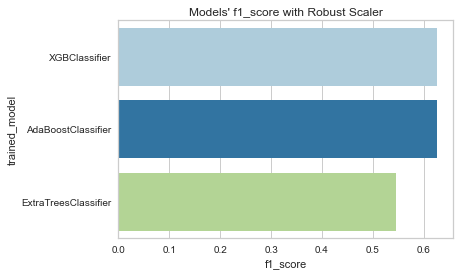

In [83]:

for metric in metric_list:
    resultList = []
    for model in model_result:
        resultList.append(model[3]['metrics_summ'][metric][1])
        
    accDF = pd.DataFrame(list(zip(nameList,resultList)),columns=['trained_model',metric])
    plt.title("Models' "+metric+ " with Robust Scaler")
    ax = sns.barplot(data=accDF.sort_values(metric,ascending=False),orient='h',palette ="Paired" , y = 'trained_model',x=metric)
    plt.show()

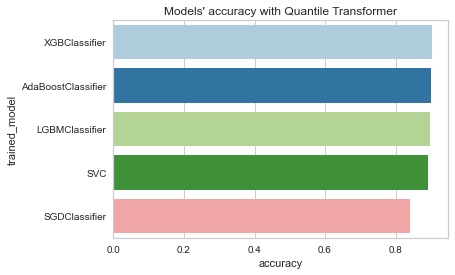

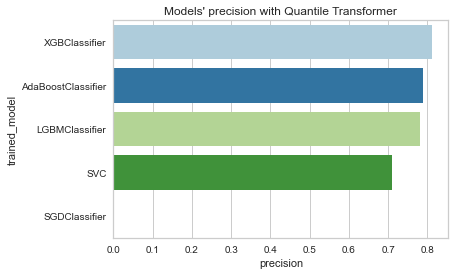

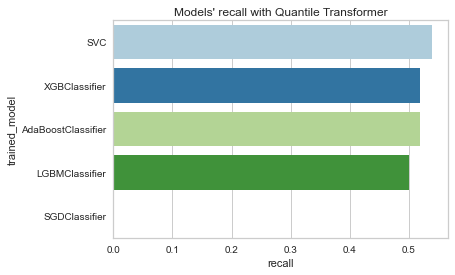

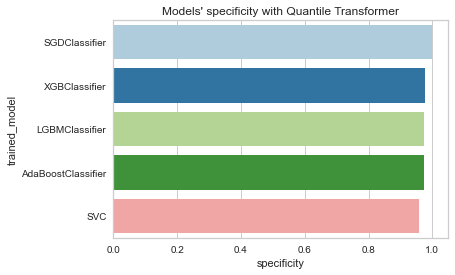

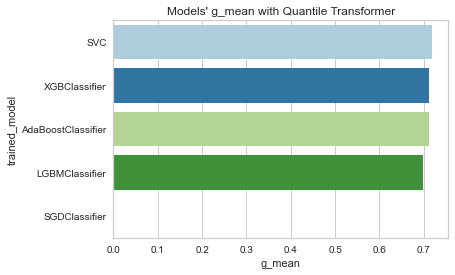

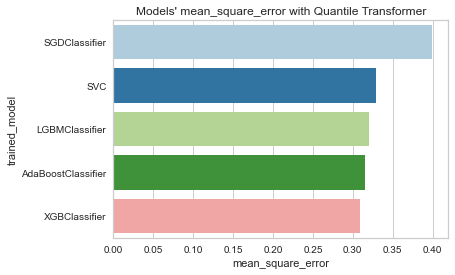

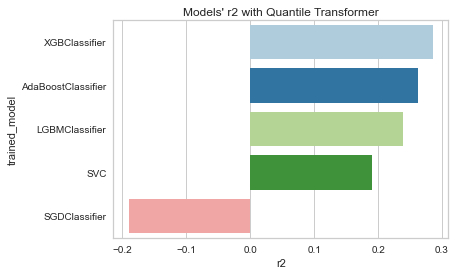

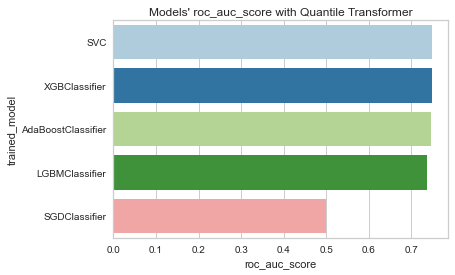

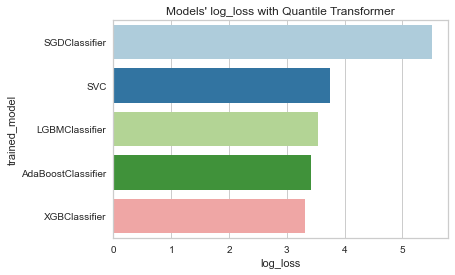

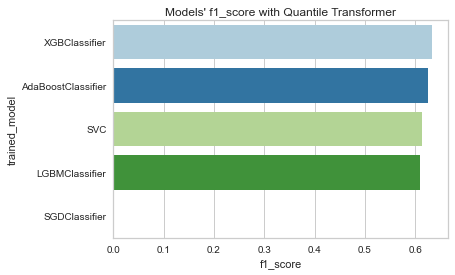

In [79]:

for metric in metric_list:
    resultList = []
    for model in model_result:
        resultList.append(model[4]['metrics_summ'][metric][1])
        
    accDF = pd.DataFrame(list(zip(nameList,resultList)),columns=['trained_model',metric])
    plt.title("Models' "+metric+ " with Quantile Transformer")
    ax = sns.barplot(data=accDF.sort_values(metric,ascending=False),orient='h',palette ="Paired" , y = 'trained_model',x=metric)
    plt.show()

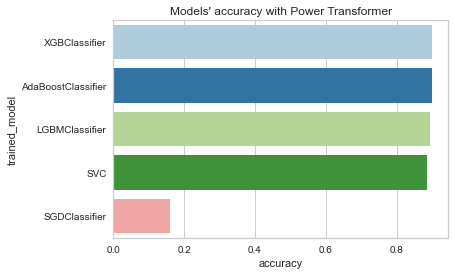

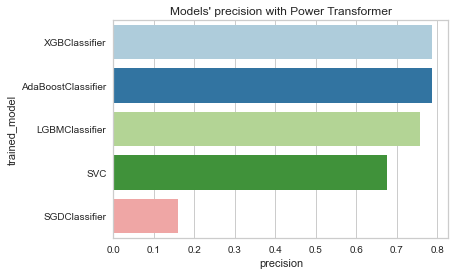

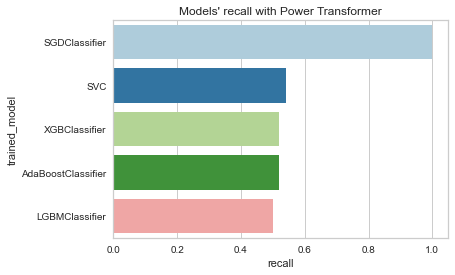

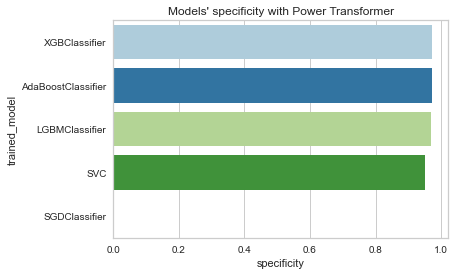

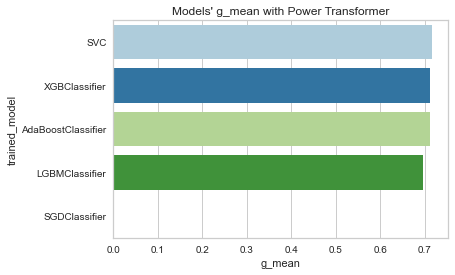

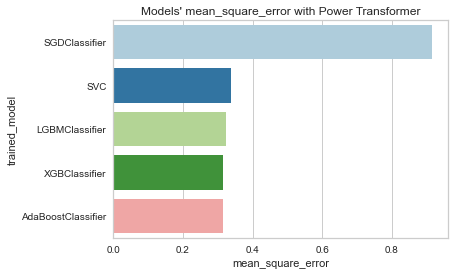

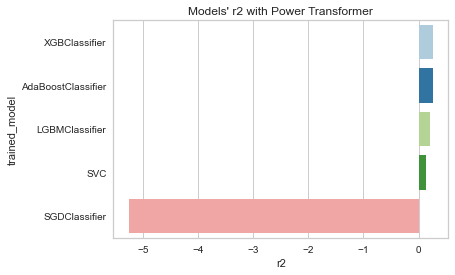

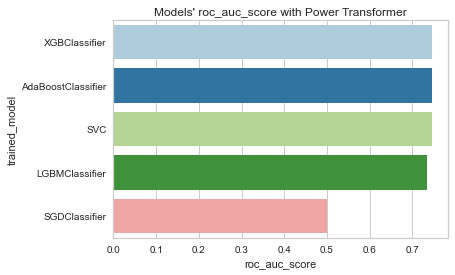

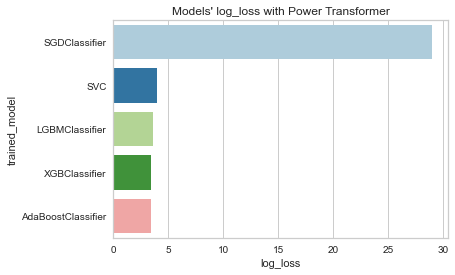

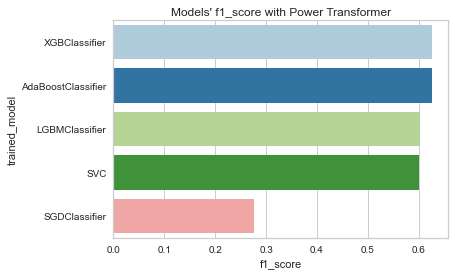

In [78]:

for metric in metric_list:
    resultList = []
    for model in model_result:
        resultList.append(model[5]['metrics_summ'][metric][1])
        
    accDF = pd.DataFrame(list(zip(nameList,resultList)),columns=['trained_model',metric])
    plt.title("Models' "+metric+ " with Power Transformer")
    ax = sns.barplot(data=accDF.sort_values(metric,ascending=False),orient='h',palette ="Paired" , y = 'trained_model',x=metric)
    plt.show()

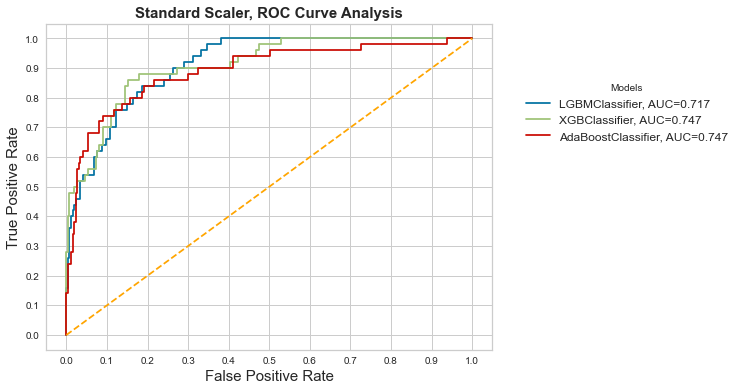

Average auc scores : 0.7366920152091255


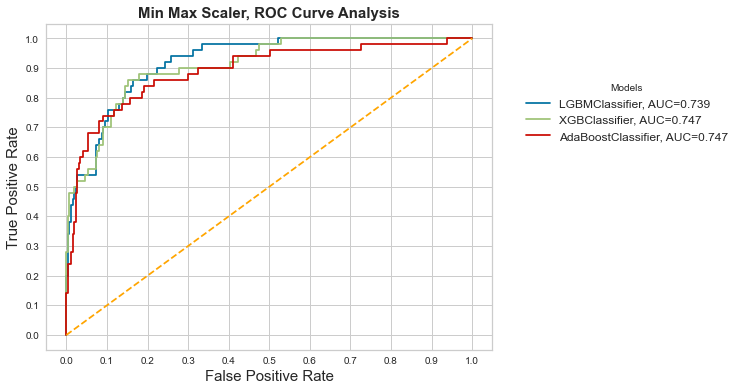

Average auc scores : 0.7439923954372624


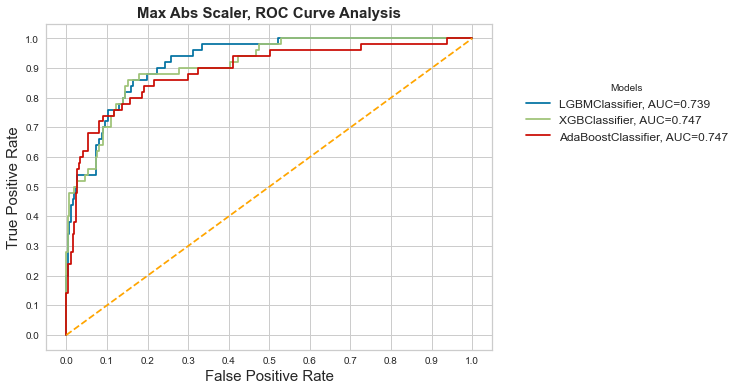

Average auc scores : 0.7439923954372624


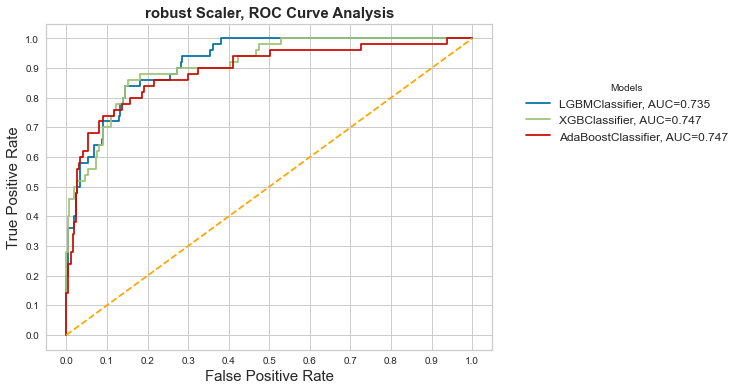

Average auc scores : 0.7427249683143219


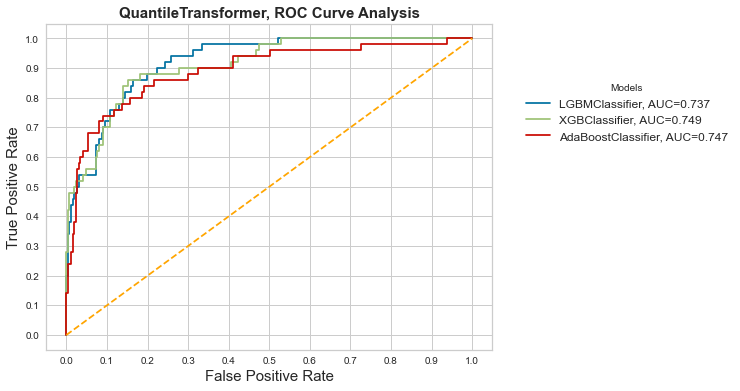

Average auc scores : 0.7439923954372624


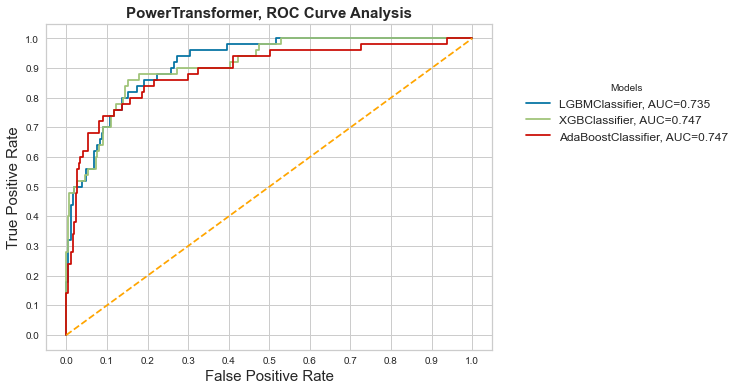

Average auc scores : 0.7427249683143219


In [76]:
scaler = ['Standard Scaler','Min Max Scaler','Max Abs Scaler','robust Scaler','QuantileTransformer','PowerTransformer']
scalerIndex = [0,1,2,3,4,5]

for scalerIndex, scalerName in zip(scalerIndex,scaler):
    aucList=[]
    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
    for model in model_result:

        fpr = model[scalerIndex]['fpr']
        if(fpr is not None):
            tpr = model[scalerIndex]['tpr']
            auc = model[scalerIndex]['metrics_summ']['roc_auc_score'][1]
            result_table = result_table.append({'classifiers':model[scalerIndex]['classifier'],
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)
            aucList.append(auc)
            
    result_table.set_index('classifiers', inplace=True)
    fontP = FontProperties()
    fontP.set_size('large')
    fig = plt.figure(figsize=(8,6))
    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    plt.plot([0,1], [0,1], color='orange', linestyle='--')
    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)
    plt.title(scalerName+', ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend( title='Models', bbox_to_anchor=(1.05, 0.85), loc='upper left', prop=fontP)
    plt.show()
    print("Average auc scores : "+str(np.average(aucList)))

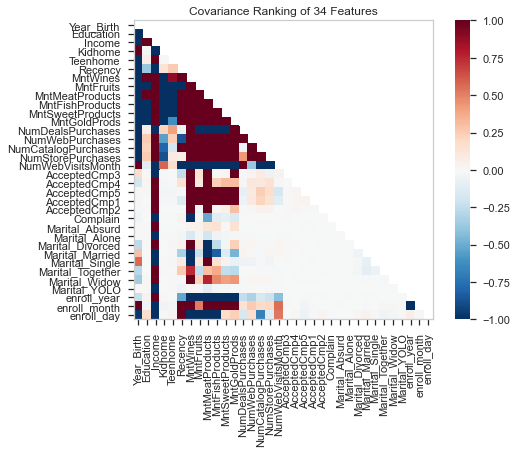

In [34]:
#plot correlationPlot
correlationPlot()

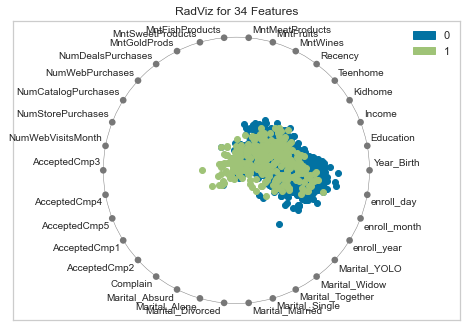

In [35]:
#plot to test separatability of classes
radVisualize()

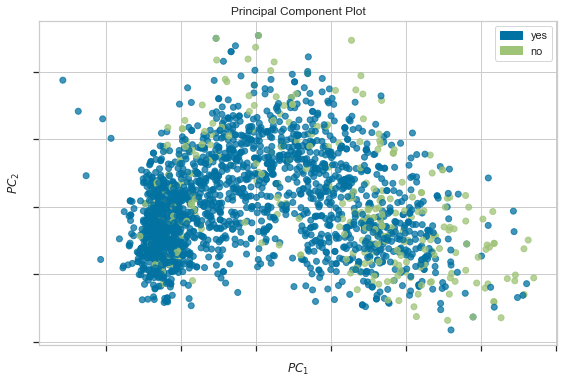

In [36]:
#plot scatter plot
pca_scatter_plot()

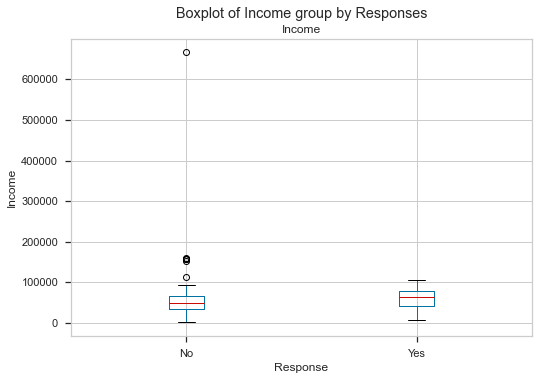

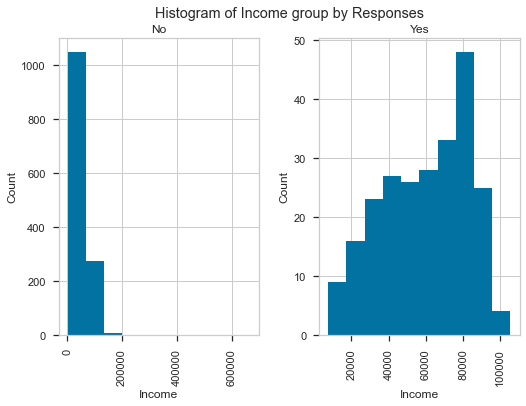

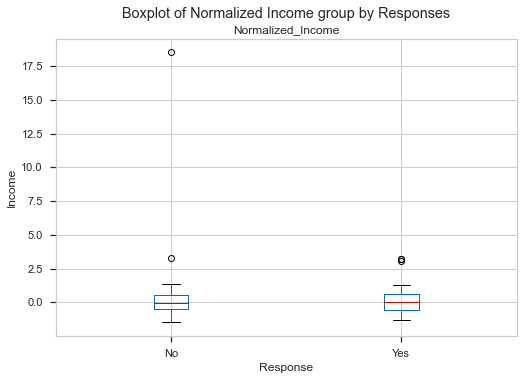

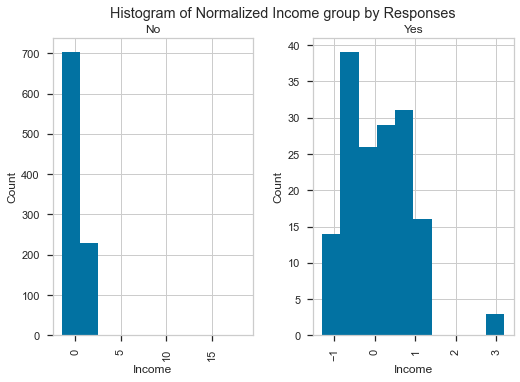

In [91]:
#get data distribution from x train and train
pd.options.plotting.backend = 'matplotlib'
incomeNResponse = pd.concat([X_train["Income"],y_train],axis=1)

incomeNResponse["Response"] = incomeNResponse["Response"].replace(to_replace={0:"No",1:"Yes"})

ax = incomeNResponse.boxplot(by="Response")

plt.Axes.set_xlabel(ax,"Response")
plt.Axes.set_ylabel(ax,"Income")
plt.suptitle("Boxplot of Income group by Responses")


axList = incomeNResponse.hist(column = "Income",by='Response')
sns.set_context('notebook')
plt.suptitle("Histogram of Income group by Responses")


for ax in axList.flatten():
    plt.Axes.set_xlabel(ax,"Income")
    plt.Axes.set_ylabel(ax,"Count")

#get normalized income
scaler = RobustScaler()
normalizedXTrainIncome=scaler.fit_transform((incomeNResponse["Income"].values).reshape(len(incomeNResponse),1))
normalizedXTrainIncome = pd.DataFrame(normalizedXTrainIncome,columns=["Normalized_Income"])
normalizedXTestIncome = scaler.transform((X_test["Income"].values).reshape(len(X_test),1))
normalizedXTestIncome = pd.DataFrame(normalizedXTestIncome,columns=["Normalized_Income"])
incomeNResponse["Normalized_Income"] = normalizedXTrainIncome

ax = incomeNResponse.boxplot(column ="Normalized_Income", by="Response")

plt.Axes.set_xlabel(ax,"Response")
plt.Axes.set_ylabel(ax,"Income")
plt.suptitle("Boxplot of Normalized Income group by Responses")


axList = incomeNResponse.hist(column = "Normalized_Income",by='Response')
sns.set_context('notebook')
plt.suptitle("Histogram of Normalized Income group by Responses")


for ax in axList.flatten():
    plt.Axes.set_xlabel(ax,"Income")
    plt.Axes.set_ylabel(ax,"Count")
pd.set_option('plotting.backend','pandas_bokeh')

In [60]:
pcaParamGrid = [{
    'transformer':PCA(),'param_grid':{'n_components':list(range(2,8)),'random_state':[42]
                                      ,'whiten':[True,False]
                                      ,'svd_solver':['full', 'arpack', 'randomized']}
},{
    'transformer':KernelPCA(),
    'param_grid':{'gamma':loguniform(1e-6, 100),'n_components':list(range(2,8))
                  ,'random_state':[42],'kernel':['rbf'],
                  'alpha':loguniform(1e-6, 100),'eigen_solver':['dense', 'arpack']
                  ,'n_jobs':[-1],'max_iter':list(range(1,1000)),'fit_inverse_transform':[True,False]}
},
    {
        'transformer':KernelPCA(),
    'param_grid':{'gamma':loguniform(1e-6, 100),'n_components':list(range(2,8))
                  ,'random_state':[42],'kernel':['poly'],
                  'alpha':loguniform(1e-6, 100),'degree':list(range(3,8))
                  ,'n_jobs':[-1],'max_iter':list(range(1,1000)),'eigen_solver':['dense', 'arpack'],
                 'fit_inverse_transform':[True,False]}
    }
]


In [63]:
differentScalerResult = pd.DataFrame()
scalers = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(), RobustScaler(),QuantileTransformer()]

for scaler in scalers:
    pcaResult = pcaComparison(scaler,pcaX_train,y_train,pcaX_test,y_test)
    differentScalerResult = differentScalerResult.append(pcaResult,ignore_index=True)
differentScalerResult.sort_values(by='MSE',ascending=True,inplace=True)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [1.26398402e-23 6.75148061e-20 4.63430122e-27            nan
            nan            nan 3.91719186e-19 2.54757978e-18
            nan            nan]
  category=UserWarning


Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [           nan            nan            nan            nan
            nan            nan 3.58664451e-31            nan
            nan            nan]
  category=UserWarning


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [1.72340355e-26 2.64517668e-21 1.88453963e-28            nan
            nan            nan 1.27477685e-20 1.23118225e-19
            nan            nan]
  category=UserWarning


Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [           nan            nan            nan            nan
            nan            nan 2.00712343e-32            nan
            nan            nan]
  category=UserWarning


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [1.54357345e-26 2.29427563e-21 1.73929750e-28            nan
            nan            nan 1.03640158e-20 1.23724193e-19
            nan            nan]
  category=UserWarning


Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [           nan            nan            nan            nan
            nan            nan 1.98141846e-32            nan
            nan            nan]
  category=UserWarning


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [9.55274266e-24 5.15627473e-20 3.39334133e-27            nan
            nan            nan 2.65832416e-19 1.91235386e-18
            nan            nan]
  category=UserWarning


Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [           nan            nan            nan            nan
            nan            nan 3.12472843e-31            nan
            nan            nan]
  category=UserWarning


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [6.53209615e-26 5.93598660e-21 4.76948248e-28            nan
            nan            nan 2.99749314e-20 3.28973105e-19
            nan            nan]
  category=UserWarning


Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [           nan            nan            nan            nan
            nan            nan 6.26074781e-32            nan
            nan            nan]
  category=UserWarning


In [64]:
differentScalerResult

,MSE,Model,Parameter,scaler
6,1.981418e-32,KernelPCA,"{'alpha': 7.577453045410569, 'degree': 7, 'eig...",MaxAbsScaler()
3,2.007123e-32,KernelPCA,"{'alpha': 7.577453045410569, 'degree': 7, 'eig...",MinMaxScaler()
12,6.260748e-32,KernelPCA,"{'alpha': 7.577453045410569, 'degree': 7, 'eig...",QuantileTransformer()
9,3.124728e-31,KernelPCA,"{'alpha': 7.577453045410569, 'degree': 7, 'eig...",RobustScaler()
0,3.586645e-31,KernelPCA,"{'alpha': 7.577453045410569, 'degree': 7, 'eig...",StandardScaler()
4,1.231182e-19,KernelPCA,"{'alpha': 2.3528990899815337e-06, 'eigen_solve...",MinMaxScaler()
7,1.237242e-19,KernelPCA,"{'alpha': 2.3528990899815337e-06, 'eigen_solve...",MaxAbsScaler()
13,3.289731e-19,KernelPCA,"{'alpha': 2.3528990899815337e-06, 'eigen_solve...",QuantileTransformer()
10,1.912354e-18,KernelPCA,"{'alpha': 2.3528990899815337e-06, 'eigen_solve...",RobustScaler()
1,2.547580e-18,KernelPCA,"{'alpha': 2.3528990899815337e-06, 'eigen_solve...",StandardScaler()


In [65]:
#use the same scaler same as pca
scaler = MaxAbsScaler()
print(scaler)
scaledXTrain = pd.DataFrame(scaler.fit_transform(pcaX_train),columns=X_cont_column)
scaledXTest = pd.DataFrame(scaler.transform(pcaX_test),columns=X_cont_column)

km_list = list()
for clust in range(2,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(scaledXTrain)
    y_pred = km.predict(scaledXTrain)
    sh = silhouette_score(scaledXTrain,y_pred)
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km,
                             'sil':sh}))
io.reset_output()
io.output_notebook()


plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia','sil']]
             .set_index('clusters'))
plot_dataInertia=plot_data['inertia'].astype(float)
ax = plot_dataInertia.plot(marker='o')

#concat so show sihhoutte score
plot_dataSil=plot_data['sil'].astype(float)
ax = plot_dataSil.plot(marker='o')


MaxAbsScaler()


Loading BokehJS ...

In [67]:
#saw 6 cluster has a good silhouette score, create kmean column with 6 cluster
km = KMeans(n_clusters=6, random_state=42)
km = km.fit(scaledXTrain)
kmeanTrainColumn = pd.Series(km.predict(scaledXTrain), name="KMeansTrain")
kmeanTestColumn = pd.Series(km.predict(scaledXTest), name="KMeansTest")

In [68]:
i=1
for rowNo,result in differentScalerResult.iterrows():
    mse,model,param,scaler = result
    print(str(i)+" "+str(model))
    print(mse)
    print(param)
    print(scaler)
    print("\n")
    if(i==5):
        break
    i+=1


1 KernelPCA
1.9814184620242587e-32
{'alpha': 7.577453045410569, 'degree': 7, 'eigen_solver': 'dense', 'fit_inverse_transform': True, 'gamma': 1.2767906371238508e-06, 'kernel': 'poly', 'max_iter': 601, 'n_components': 5, 'n_jobs': -1, 'random_state': 42}
MaxAbsScaler()


2 KernelPCA
2.0071234308867072e-32
{'alpha': 7.577453045410569, 'degree': 7, 'eigen_solver': 'dense', 'fit_inverse_transform': True, 'gamma': 1.2767906371238508e-06, 'kernel': 'poly', 'max_iter': 601, 'n_components': 5, 'n_jobs': -1, 'random_state': 42}
MinMaxScaler()


3 KernelPCA
6.260747813411377e-32
{'alpha': 7.577453045410569, 'degree': 7, 'eigen_solver': 'dense', 'fit_inverse_transform': True, 'gamma': 1.2767906371238508e-06, 'kernel': 'poly', 'max_iter': 601, 'n_components': 5, 'n_jobs': -1, 'random_state': 42}
QuantileTransformer()


4 KernelPCA
3.1247284294229762e-31
{'alpha': 7.577453045410569, 'degree': 7, 'eigen_solver': 'dense', 'fit_inverse_transform': True, 'gamma': 1.2767906371238508e-06, 'kernel': 'poly

In [81]:
#KernelPCA has the lowest error
kpca = KernelPCA(alpha=7.577453045410569, degree= 7, eigen_solver= "dense"
                 , fit_inverse_transform= True, gamma= 1.2767906371238508e-06
                 , kernel= "poly", max_iter= 601, n_components= 5, n_jobs= -1, random_state= 42)
scaler= MaxAbsScaler()
X_train_scaled = scaler.fit_transform(pcaX_train,y_train)
X_test_scaled = scaler.transform(pcaX_test)

kpca = kpca.fit(X_train_scaled,y_train)
transformedXTrain = kpca.transform(X_train_scaled)
transformedXTest=kpca.transform(X_test_scaled)


In [83]:
explained_variance = np.var(transformedXTrain, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print("Explained Variance : \n" +str(explained_variance))
print("Explained Variance Ratio: \n"+str(explained_variance_ratio))

Explained Variance : 
[1.79704429e-06 7.61323360e-07 7.48161573e-07 3.53106625e-07
 3.04646066e-07]
Explained Variance Ratio: 
[0.4533089  0.19204572 0.18872562 0.08907203 0.07684773]


In [84]:
kpcaCol = ["PCA1","PCA2","PCA3","PCA4","PCA5"]
kpcaTrain = pd.DataFrame(transformedXTrain,columns = kpcaCol)
kpcaTest = pd.DataFrame(transformedXTest, columns = kpcaCol)
#reset all train test columns to ensure consistency before merging
X_train = X_train.reset_index()
X_test = X_test.reset_index()
y_train = y_train.reset_index()
y_test = y_test.reset_index()
#drop all continuous columns

X_train_Kmeans = X_train.copy()
X_test_Kmeans = X_test.copy()
X_train_PCA_Kmeans = X_train.drop(columns=X_cont_column,axis=1)
X_test_PCA_Kmeans = X_test.drop(columns=X_cont_column,axis=1)


In [85]:
#remove default unimportant column
unimportant = ["index","Year_Birth","enroll_year","enroll_month","enroll_day"]
X_train_Kmeans = X_train_Kmeans.drop(columns=unimportant,axis=1)
X_test_Kmeans = X_test_Kmeans.drop(columns=unimportant,axis=1)
X_train_PCA_Kmeans = X_train_PCA_Kmeans.drop(columns=unimportant,axis=1)
X_test_PCA_Kmeans = X_test_PCA_Kmeans.drop(columns=unimportant,axis=1)
X_train = X_train.drop(columns=unimportant,axis=1)
X_test = X_test.drop(columns=unimportant,axis=1)

In [87]:
#add kmean column into all known data except x_train
X_train_Kmeans["KMean"]=kmeanTrainColumn
X_test_Kmeans["KMean"]=kmeanTestColumn
X_train_PCA_Kmeans["KMean"]=kmeanTestColumn
X_test_PCA_Kmeans["KMean"]=kmeanTestColumn

In [90]:
#addPCA column
kpcaCol = ["PCA1","PCA2","PCA3","PCA4","PCA5"]

#PCA and Kmeans
X_train_PCA_Kmeans[kpcaCol]=kpcaTrain
X_test_PCA_Kmeans[kpcaCol]=kpcaTest

#PCA only
X_train_PCA = kpcaTrain
X_test_PCA = kpcaTest

In [98]:
rbf_sampler = RBFSampler(gamma = 5.0,n_components=100)
X_train_rbf = rbf_sampler.fit_transform(X_train)
X_test_rbf = rbf_sampler.transform(X_test)

(1568, 100)

In [ ]:
#smote all train data except x test and y test
# four type of data generated can be used to evaluate model
# stratified(SMOTE) x
# stratified(SMOTE) x with k means
# stratified(SMOTE) x with pca
# stratified(SMOTE) x with pca and rbf
# stratified(SMOTE) x with pca and k means


In [ ]:
def cross_validate(classifier, cv):
    #only use Quantile Transformer as previously show it has the best accuracy
	scalers = [QuantileTransformer()]
	train_acc = []
	test_acc = []
	mean = []
	result = []
	for scaler in scalers:
		fpr = None
		tpr = None
		preprocess = setupPreprocessPipeline(scaler)
		pipeline = Pipeline(steps=[
	        ('preprocess', preprocess),
	        ('classifier', classifier)
		])

		train_acc = []
		test_acc = []
		mean = []

		for train_ind, val_ind in cv.split(X_train, y_train):
			X_t, y_t = X_train.iloc[train_ind], y_train.iloc[train_ind]
			pipeline.fit(X_t, y_t)
			y_hat_t = pipeline.predict(X_t)
			train_acc.append(accuracy_score(y_t, y_hat_t))
			X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind] 
			y_hat_val = pipeline.predict(X_val)
			test_acc.append(accuracy_score(y_val, y_hat_val))

		#ohe_cols = list(pipeline.named_steps['preprocess'].named_transformers_['cat'].named_steps['ohe'].get_feature_names(input_features=categorical))
		numeric_feature_list = list(numerical)
		for i in ohe_cols:
			numeric_feature_list.append(i)
		#print(len(numeric_feature_list))
		#evaluation(y_val, y_hat_val, 'Confusion Matrix {} + {}'.format(classifier.__class__.__name__, scaler.__class__.__name__).strip())
		print('Mean Training Accuracy: {} | Standard Deviation: {}'.format(np.mean(train_acc),np.std(test_acc)))
		print('Mean Validation Accuracy: {} | Standard Deviation: {}'.format(np.mean(test_acc),np.std(test_acc)))
		print('\n')
		feature_importance(classifier, numeric_feature_list, scaler.__class__.__name__ )
		metrics_summ = metrics_summary(y_val,y_hat_val)
		if hasmethod(pipeline['classifier'], 'predict_proba'):
			fpr,tpr = ROC_Curve_Plot(pipeline,X_val,y_val,classifier.__class__.__name__ +" w "+scaler.__class__.__name__)
		result.append({
            'classifier':classifier.__class__.__name__,
            'scalerName':scaler.__class__.__name__,
            'metrics_summ':metrics_summ,
            'fpr':fpr,
            'tpr':tpr
        })
	return result

In [ ]:
models = [
	#Lasso(),
	SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet"),
	LinearSVC(), 
	GaussianProcessClassifier(),
	ExtraTreesClassifier(),   #guassiannb, guassian process, mlpclassifier, 
	BernoulliNB(),
	LogisticRegressionCV(max_iter= 1200), 
	RidgeClassifierCV(),
	SVC(kernel = 'linear',max_iter= -1), 
	Perceptron(),
	PassiveAggressiveClassifier(), 
	DecisionTreeClassifier(), #no coef 
	KNeighborsClassifier(),#no feat_import, use permutation_importance 
	GaussianNB(), #no feat_import, use permutation_importance 
	LGBMClassifier(),#no coef 
	RandomForestClassifier(), #no coef 
	GradientBoostingClassifier(),#no coef 
	PassiveAggressiveClassifier(), 
	ExtraTreesClassifier(), #no coef 
	XGBClassifier(),
	AdaBoostClassifier(), #no coef
# 	MLPClassifier() #mlp not working
	]


model_result = []
classes = ["no", "yes"]
for model in models:
	print(model.__class__.__name__)
	model_result.append(cross_validate(model,KFold()))
	overallClassificationReport(model,classes)
	if hasmethod(model, 'predict_proba'):
		ROC_Curve_Plot(model,X_test,y_test,"Overall "+model.__class__.__name__)
	if has_feature_imp(model) :
		overall_feature_importance(model)
warnings.filterwarnings("default")

In [142]:
#Grid search params
scoring = 'f1'
fold=10
featureNumList = list(range(1,X_train.shape[1]))
modelsWithParam = [
    {#not using adaboost here, it was an ensemble method
        'model':XGBClassifier(),'param':{
        'n_estimators':list(range(100,1000,100)),
        'max_depth ':list(range(10,100,10)),
        'learning_rate': [1.0,0.1,0.01,0.005,0.001,0.0005,0.0001],
        'verbosity':[1],
        'booster ':["gbtree","gblinear","dart"],
        'tree_method':["exact","grow_local_histmaker","approx","gpu_hist"],
        'subsample':[0.8],
        'colsample_bytree':[1],
        'gamma':[1,0.1,0.01,0.005,0.001,0.0005,0.0001],
        'num_parallel_tree':list(range(5,50,5)),
        'importance_type':["gain","weight","cover","total_gain","total_cover"],
        'random_state': [42],
        'n_jobs':[-1]
        }
},{
        'model':LGBMClassifier(),'param':{
        'boosting_type':["gbdt","dart","goss","rf"],
        'metric':['binary_logloss'],
        'sub_feature':list(np.arange(0.1,1,10)),
        'num_leaves':list(range(10,50,10)),
        'learning_rate': [1,0.1,0.01,0.005,0.001,0.0005,0.0001],
        'n_estimators': list(range(100,1000,100)),
        'min_data':[50],
        'max_depth': list(range(5,20,5)),
        'min_split_gain':list(np.arange(0.1,1,10)),
        'random_state': [42]
    }},{
            
        'model':SVC(),'param':{
        'C': [ 1,0.1,10, 100, 1000],  
        'gamma': [1,0.1,0.01,0.005,0.001,0.0005,0.0001], 
        'kernel': ['linear', 'rbf', 'sigmoid', 'precomputed'],
        'random_state': [42] 
    }},
    { #split svc into 2 as svc poly and non-poly kernel has
        #different parameter
        'model':SVC(),'param':{
        'C': [0.1, 1, 10, 100, 1000],  
        'gamma': [1,0.1,0.01,0.005,0.001,0.0005,0.0001], 
        'kernel': ['poly'],
        'degree':[3,4,5,6],
        'random_state': [42],
    }},{#split logistic regression into as saga solver has different parameter needs
        'model':LogisticRegression(),'param':{'Cs': [[100,10,1, 0.1,0.05,0.001,0.0001]],#100,10,1, 0.1, 0.01, 0.001
                                 'fit_intercept':[True,False],
                                 'normalize':[True,False],
                                 'dual':[True,False],
                                 'penalty':['L2'],
                                 'penalty':[True],
                                 'max_iter':list(range(100,1000,100)),#[50,100,500,1000,2000,4000,8000]
                                 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag'],
                                 'random_state':[42]
        }},
        {
        'model':LogisticRegression(),'param':{'Cs': [[100,10,1, 0.1,0.05,0.001,0.0001]],#100,10,1, 0.1, 0.01, 0.001
                                 'fit_intercept':[True,False],
                                 'normalize':[True,False],
                                 'penalty':['elasticnet'],
                                 'penalty':[True],
                                 'max_iter':list(range(100,1000,100)),#[50,100,500,1000,2000,4000,8000]
                                 'solver':['saga'],
                                 'random_state':[42]
        }}]

In [143]:
#gridsearchcv
def modelBestFit(item):
    model = item['model']
    paramGrid = item['param']
    search = GridSearchCV(model, paramGrid,n_jobs=-1,pre_dispatch='1*n_jobs',scoring = scoring,refit = True)
    search.fit(X_train,y_train.values)
    best_score =search.score(X_test,y_test.values)
    model_name = model.__class__.__name__
    return {'model_name':model_name,'best_score':best_score,'best_model':search.best_estimator_}

def bestModel(modelsAndParams):
    modelPerformance = pd.DataFrame()
    for item in modelsAndParams:
        result = modelBestFit(item)
        
        modelPerformance = modelPerformance.append(result,ignore_index=True)
        
    modelPerformance.sort_values(by='best_score',ascending=False,inplace=True)
    return modelPerformance
result = bestModel(modelsWithParam)
result

KeyboardInterrupt: 

In [ ]:
#Randomized and bayesian search params
scoring = 'f1'
fold=10
featureNumList = list(range(1,X_train.shape[1]))
modelsWithParam = [
    {#not using adaboost here, it was an ensemble method
        'model':XGBClassifier(),'param':{
        'n_'
        'n_estimators':list(range(100,1000,100)),
        'max_depth ':list(range(10,100,10)),
        'learning_rate': [1.0,0.1,0.01,0.005,0.001,0.0005,0.0001],
        'verbosity':[1],
        'booster ':["gbtree","gblinear","dart"],
        'tree_method':["exact","grow_local_histmaker","approx","gpu_hist"],
        'subsample':[0.8],
        'colsample_bytree':[1],
        'gamma':[1,0.1,0.01,0.005,0.001,0.0005,0.0001],
        'num_parallel_tree':list(range(5,50,5)),
        'importance_type':["gain","weight","cover","total_gain","total_cover"],
        'random_state': [42],
        'n_jobs'[-1]
        }
},{
        'model':LGBMClassifier(),'param':{
        'boosting_type':["gbdt","dart","goss","rf"],
        'metric':['binary_logloss'],
        'sub_feature':list(np.arange(0.1,1,10)),
        'num_leaves':list(range(10,50,10)),
        'learning_rate': [1,0.1,0.01,0.005,0.001,0.0005,0.0001],
        'n_estimators': list(range(100,1000,100)),
        'min_data':[50],
        'max_depth': list(range(5,20,5)),
        'min_split_gain':list(np.arange(0.1,1,10)),
        'random_state': [42]
    }},{
            
        'model':SVC(),'param':{
        'C': [ 1,0.1,10, 100, 1000],  
        'gamma': [1,0.1,0.01,0.005,0.001,0.0005,0.0001], 
        'kernel': ['linear', 'rbf', 'sigmoid', 'precomputed'],
        'random_state': [42] 
    }},
    { #split svc into 2 as svc poly and non-poly kernel has
        #different parameter
        'model':SVC(),'param':{
        'C': [0.1, 1, 10, 100, 1000],  
        'gamma': [1,0.1,0.01,0.005,0.001,0.0005,0.0001], 
        'kernel': ['poly'],
        'degree':list(range(3,10)),
        'random_state': [42],
    }},{#split logistic regression into as saga solver has different parameter needs
        'model':LogisticRegressionCV(),'param':{'Cs': [[100,10,1, 0.1,0.05,0.001,0.0001]],#100,10,1, 0.1, 0.01, 0.001
                                 'fit_intercept':[True,False],
                                 'normalize':[True,False],
                                 'dual':[True,False],
                                 'penalty':['L2'],
                                 'penalty':[True],
                                 'max_iter':list(range(100,1000,100)),#[50,100,500,1000,2000,4000,8000]
                                 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag'],
                                 'random_state':[42]
        }},
        {
        'model':LogisticRegressionCV(),'param':{'Cs': [[100,10,1, 0.1,0.05,0.001,0.0001]],#100,10,1, 0.1, 0.01, 0.001
                                 'fit_intercept':[True,False],
                                 'normalize':[True,False],
                                 'penalty':['elasticnet'],
                                 'penalty':[True],
                                 'max_iter':list(range(100,1000,100)),#[50,100,500,1000,2000,4000,8000]
                                 'solver':['saga'],
                                 'random_state':[42]
        }}]

In [ ]:
#randomised search cv
def modelBestFit(item):
    model = item['model']
    paramGrid = item['param']
    search = RandomizedSearchCV(model, paramGrid,n_jobs=-1,pre_dispatch='1*n_jobs',scoring = scoring,refit = True,cv=fold)
    search.fit(X_train,y_train.values)
    best_score =search.score(X_test,y_test.values)
    model_name = model.__class__.__name__
    return {'model_name':model_name,'best_score':best_score,'best_model':search.best_estimator_}

def bestModel(modelsAndParams):
    modelPerformance = pd.DataFrame()
    for item in modelsAndParams:
        result = modelBestFit(item)
        
        modelPerformance = modelPerformance.append(result,ignore_index=True)
        
    modelPerformance.sort_values(by='best_score',ascending=False,inplace=True)
    return modelPerformance
 
result = bestModel(modelsWithParam)

In [ ]:
result

In [298]:
#bayesian search cv
def modelBestFit(item,x_train,y_train,x_test,y_test):
    model = item['model']
    paramGrid = item['param']
    search = BayesSearchCV(model, paramGrid,n_jobs=-1,pre_dispatch='1*n_jobs'
                           ,scoring = scoring,refit = True,cv = fold)
    search.fit(x_train,y_train.values)
    best_score =search.score(x_test,y_test.values)
    model_name = model.__class__.__name__
    return {'model_name':model_name,'best_score':best_score,'best_model':search.best_estimator_}

def bestModel(modelsAndParams,x_train,y_train,x_test,y_test):
    modelPerformance = pd.DataFrame()
    for item in modelsAndParams:
        result = modelBestFit(item,x_train,y_train,x_test,y_test)
        
        modelPerformance = modelPerformance.append(result,ignore_index=True)
        
    modelPerformance.sort_values(by='best_score',ascending=False,inplace=True)
    return modelPerformance
 
result = bestModel(modelsWithParam)

In [ ]:
ensembleParameter = 
    {#no
        'model':AdaBoostClassifier(),'param': {
        #also included decisiontreeclassifier as it is the default estimator
        'base_estimator': [XGBClassifier() 
                           ,LGBMClassifier(),SVC(),LogisticRegressionCV()],
        'n_estimators':list(range(100,1000,100)),
        'learning_rate': [1.0,0.1,0.01,0.005,0.001,0.0005,0.0001],
        'algorithm': ["SAMME", "SAMME.R"],
        'min_samples_leaf': list(range(5,50,5)),
        'max_depth':list(range(10,100,10)),
        'random_state': [42]
        }}

In [ ]:
from sklearn.ensemble import VotingClassifier
classifiers =[('xgb',XGBClassifier()),('lgbm',LGBMClassifier())
              ,('svc',SVC()),('log',LogisticRegressionCV())]

def votingClassifierReport(classifiers,voting):
    usableClassifier = []
    if(voting =='soft'):
        for i in classifiers:
            if hasattr(i[1],'predict_proba'):
                usableClassifier.append(i)
    else:
        usableClassifier = classifiers
    classes =['yes','no']
    #majority voting
    in_use_classifiers=""
    for i in usableClassifier:
        in_use_classifiers = in_use_classifiers+" "+str(i[1].__class__.__name__)
    print("Classifiers: "+in_use_classifiers)
    voting = VotingClassifier(estimators=usableClassifier, voting=voting)
    overallClassificationReport(voting,classes)


In [ ]:
votingClassifierReport(classifiers,'hard')

In [ ]:
votingClassifierReport(classifiers,'soft')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from deslib.des.knora_e import KNORAE
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from deslib.dcs.ola import OLA
from deslib.dcs.a_priori import APriori
from deslib.dcs.mcb import MCB

#import DES techniques from DESlib
from deslib.des.des_p import DESP
from deslib.des.knora_u import KNORAU
from deslib.des.knora_e import KNORAE
from deslib.des.meta_des import METADES

In [ ]:
ada = AdaBoostClassifier(n_estimators=100)

overallClassificationReport(ada,classes)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=3, random_state=0).fit(X_train, y_train)
overallClassificationReport(clf,classes)

In [ ]:
clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
overallClassificationReport(clf,classes)

In [ ]:
def stackingClassifier(classifiers):
    clf = StackingClassifier(estimators=classifiers,cv=10)
    overallClassificationReport(clf,classes)

In [ ]:
def bestDesLibClassifiersByF1(pool_classifiers,X_train,y_train,X_test,y_test):
    deslibEnsClassifiers= [OLA(pool_classifiers),MCB(pool_classifiers),APriori(pool_classifiers)
                       ,KNORAU(pool_classifiers),KNORAE(pool_classifiers),DESP(pool_classifiers)
                      ,METADES(pool_classifiers)]
    X_train, X_dsel, y_train, y_dsel = train_test_split(X_train, y_train, test_size=0.5)
    best_classifier= None
    best_score= 0
    for model in deslibEnsClassifiers:
        model = model.fit(X_train,y_train)
        y_pred = model.predict(X_dsel)
        f1 = f1_score(y_dsel,y_pred)
        if f1>best_score:
            best_score=f1
            best_classifier = model
    
    return {'best_classifier':best_classifier,'f1_score':best_score}

def getBaggingBasedPoolClassifier(baseClassifier):
    model = CalibratedClassifierCV(baseClassifier)
    pool_classifiers = BaggingClassifier(model,n_estimators=10)
    pool_classifiers.fit(X_train, y_train)
    return pool_classifiers

In [ ]:
pool_classifiers = getBaggingBasedPoolClassifier(GradientBoostingClassifier())# Perceptron(max_iter=10) #SVC #DecisionTree #GradientBoostingClassifier 
result = bestDesLibClassifiersByF1(pool_classifiers,X_train,y_train,X_test,y_test)

In [ ]:
#best_class = result['best_classifier']
overallClassificationReport(best_class,['yes','no'])

1. get most suitable scaler
2. scale current data ( continuous column and salary in
                       X-train,x-test) using robust scaler
3. add cluster column from k-mean
4. for pca, transformation using standard scaled data(using continous column)
5. add kmean column & graph
6. use pca generated column+kmean column to do
model hyperparameter search on top 5 model
7. use top 8 feature + kmean column to do
model hyperparameter search on top 5 model
8. compare performance
9. use best model in ensemble method

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV 
from sklearn.linear_model import Perceptron, LogisticRegressionCV, RidgeClassifierCV, SGDClassifier, PassiveAggressiveClassifier, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve, auc, classification_report,precision_score,recall_score,log_loss,f1_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, LabelEncoder, OneHotEncoder, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer,minmax_scale,PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
import pandas_bokeh
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV
from numpy import mean, std
import pandas.testing as tm
from scipy import stats
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import ExtraTreeClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer

# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.kernel_approximation import RBFSampler, Nystroem

#other
from math import sqrt

import eli5

from yellowbrick.features import Rank2D

from yellowbrick.features import PCA as PCA_YB
from yellowbrick.features.radviz import RadViz
from yellowbrick.features import pca_decomposition
from yellowbrick.features import Manifold
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import CVScores
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import ParallelCoordinates
from yellowbrick.model_selection import RFECV
from yellowbrick.classifier import ROCAUC

from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE,SVMSMOTE,ADASYN, KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler,CondensedNearestNeighbour, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, InstanceHardnessThreshold, NearMiss, NeighbourhoodCleaningRule, OneSidedSelection,TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek


DATASET_URL = "https://gist.githubusercontent.com/YHYeoh/ad1a7f7170c72d621d05a70637540152/raw/5a6059c199e2c46d2f3d258f03d93cfea98e2749/marketing_campaign.csv"
data = pd.read_csv(DATASET_URL, sep = ';')

pd.set_option('plotting.backend','pandas_bokeh')

#data.fillna(method = "ffill", inplace = True)
# data.interpolate(method="linear",inplace = True)
#imr = KNNImputer(missing_values = np.nan)
imr = IterativeImputer(random_state=42, max_iter=100, min_value=data['Income'].min())
imr = imr.fit(data[['Income']])
data['Income'] = imr.transform(data[['Income']]).ravel()
# iter_imp = IterativeImputer(random_state= 42)
# data["Income"] = iter_imp.fit_transform(data["Income"])
print(data.isnull().values.any())

label_encoder = LabelEncoder()
enc = OneHotEncoder()
data["Education"] = label_encoder.fit_transform(data["Education"])
print(label_encoder.classes_)
# enc_df = pd.DataFrame(enc.fit_transform(data[["Marital_Status"]]).toarray())
# print(enc.get_feature_names())
# data = data.join(enc_df)

# data = data[(np.abs(stats.zscore(data[['Income']])) < 3)]

data = pd.concat([data, pd.get_dummies(data["Marital_Status"],prefix="Marital")], axis=1)

data['enroll_year'] = pd.DatetimeIndex(data.Dt_Customer).year
data['enroll_month'] = pd.DatetimeIndex(data.Dt_Customer).month
data['enroll_day'] = pd.DatetimeIndex(data.Dt_Customer).day

data.drop(["ID", 'Dt_Customer',"Z_CostContact","Z_Revenue","Marital_Status"], axis=1, inplace=True)

categorical = ['Marital_Status']
numerical = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'enroll_year', 'enroll_month', 'enroll_day']
numerical_no_bool = ['Education','Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','enroll_day','enroll_month','enroll_year']

y = data.Response
X = data.drop(['Response'], axis=1)

polynomial_features= PolynomialFeatures(degree=2)
X = polynomial_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.30, shuffle = True, stratify = y)

pca = PCA(.95,whiten=True)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#oversample = SMOTE()
#oversample = RandomOverSampler(sampling_strategy='minority')
#oversample =BorderlineSMOTE()
#oversample = SVMSMOTE()
#oversample = ADASYN()
combine = SMOTEENN()
#combine = SMOTETomek()
#undersample = RandomUnderSampler(sampling_strategy="majority")
#undersample = CondensedNearestNeighbour(sampling_strategy="majority")
#undersample = EditedNearestNeighbours(sampling_strategy="majority")
#undersample = RepeatedEditedNearestNeighbours(sampling_strategy="majority")
#undersample = AllKNN(sampling_strategy="majority")
# undersample = InstanceHardnessThreshold(sampling_strategy="majority") 
# undersample = NearMiss(sampling_strategy="majority") 
# undersample = NeighbourhoodCleaningRule(sampling_strategy="majority") 
# undersample = OneSidedSelection(sampling_strategy="majority")
# undersample = TomekLinks(sampling_strategy="majority")
#X_train, y_train = oversample.fit_resample(X_train, y_train)
#X_train, y_train = undersample.fit_resample(X_train, y_train)
X_train, y_train = combine.fit_resample(X_train, y_train)

# 'majority': resample only the majority class;

# 'not minority': resample all classes but the minority class;

# 'not majority': resample all classes but the majority class;

# 'all': resample all classes;

# 'auto': equivalent to 'not minority'.


feature_map_nystroem = Nystroem(kernel = 'linear', n_components=500)
X_train = feature_map_nystroem.fit_transform(X_train)
X_test = feature_map_nystroem.transform(X_test)

# rbf_sampler = RBFSampler(gamma = 5.0,n_components=100)
# X_train = rbf_sampler.fit_transform(X_train)
# X_test = rbf_sampler.transform(X_test)

# visualizer = Rank2D(
#     features=X.columns, algorithm='covariance'
# )
# visualizer.fit(X, y)                # Fit the data to the visualizer
# visualizer.transform(X)             # Transform the data
# visualizer.show()                   # Finalize and render the figure
# plt.figure(figsize=(3,3))

# visualizer = PCA_YB(proj_features=True)
# visualizer.fit_transform(X, y)
# visualizer.show()

# visualizer = RadViz()
# visualizer.fit(X, y)
# visualizer.transform(X)
# visualizer.show()

# visualizer = pca_decomposition(
#     X, y, scale=True, classes=[]
# )
# visualizer.show()
z

models = [
	#Lasso(),
	SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet"),
	LinearSVC(), 
	GaussianProcessClassifier(),
	ExtraTreeClassifier(),
	BernoulliNB(),
	LogisticRegressionCV(max_iter= 1200), 
	RidgeClassifierCV(),
	SVC(kernel = 'linear',max_iter= -1), 
	Perceptron(),
	PassiveAggressiveClassifier(), 
	DecisionTreeClassifier(), #no coef 
	KNeighborsClassifier(),#no feat_import, use permutation_importance 
	GaussianNB(), #no feat_import, use permutation_importance 
	LGBMClassifier(),#no coef 
	RandomForestClassifier(), #no coef 
	GradientBoostingClassifier(),#no coef 
	PassiveAggressiveClassifier(), 
	ExtraTreesClassifier(), #no coef 
	XGBClassifier(),
	AdaBoostClassifier(), #no coef 
	]

classes = ["no", "yes"]
for model in models:
	#print(model.__class__.__name__)
	#cross_validate(model,KFold())
	visualizer = ClassificationReport(model, classes=classes, support=True)
	visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
	visualizer.score(X_test, y_test)        # Evaluate the model on the test data
	visualizer.show()
	# visualizer = ROCAUC(model, classes=classes)
	# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
	# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
	# visualizer.show()
	viz = PrecisionRecallCurve(
    model
	)
	viz.fit(X_train, y_train)
	viz.score(X_test, y_test)
	viz.show()
	# visualizer = ClassPredictionError(
 #    model, classes=classes
	# )

	# # Fit the training data to the visualizer
	# visualizer.fit(X_train, y_train)

	# # Evaluate the model on the test data
	# visualizer.score(X_test, y_test)

	# # Draw visualization
	# visualizer.show()

	# cv = StratifiedKFold(n_splits=12)
	# sizes = np.linspace(0.3, 1.0, 10)

	# # Instantiate the classification model and visualizer
	# visualizer = LearningCurve(
	#     model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
	# )

	# visualizer.fit(X, y)        # Fit the data to the visualizer
	# visualizer.show()  

	cv = StratifiedKFold(n_splits=12, random_state=42)
	visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

	visualizer.fit(X, y)        # Fit the data to the visualizer
	visualizer.show()    

	# labels = list(map(lambda s: s.title(), X.columns))
	# viz = FeatureImportances(model, labels=labels, relative=False, topn = 8)

	# # Fit and show the feature importances
	# viz.fit(X, y)
	# viz.show()

	# classes = ["no", "yes"]
	# visualizer = ParallelCoordinates(
 #    classes=classes, features=X.columns,#columns need to filter top 8
 #    normalize='standard', sample=0.05, shuffle=True,fast=True
	# )# normalize : minmax, maxabs, standard, l1, or l2

	# # Fit the visualizer and display it
	# visualizer.fit_transform(X, y)
	# visualizer.show()z

	#cv = StratifiedKFold(5)
	# # Instantiate RFECV visualizer with a linear SVM classifier
	# visualizer = RFECV(model)

	# visualizer.fit(data_transformed, y)        # Fit the data to the visualizer
	# visualizer.show() 
